<a href="https://colab.research.google.com/github/sperezg6/Tesina/blob/main/modelado_generacion_musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Modelado y Generación Musical: Una Aproximación Mediante Redes Neuronales y Entradas MIDI</p>


<p style="font-family:Segoe UI;font-size:120%;color:#FFFFF;">Welcome to this Jupyter Notebook, the digital canvas where my two greatest passions converge: music and machine learning. At the heart of this exploration lies a fascination with the intricate dance between technology and melody, an adventure into how ML can transform MIDI notes into captivating symphonies. As we embark on this journey together, we delve into the algorithms and creativity that fuel the future of music generation. Music, my utmost passion, serves as both the inspiration and the destination for this academic endeavor. Join me as we uncover the melodies that lie waiting in the realm of bits and bytes, crafting harmonies guided by the science of artificial intelligence.</p>

<div class="list-group" id="list-tab" role="tablist">
 <p style="font-family:newtimeroman;color:#97BACB#97BACB;font-size:120%;text-align:center;border-radius:40px 40px;">TABLE OF CONTENTS</p>

    
* [1. Install Dependencies](#1)
    
* [2. Importing Libraries](#2)
    
* [3. Data Processing](#3)  
    
* [4. Data Exploration](#4)  
    
* [5. MODEL BUILDING](#5)
      
* [6. EVALUATING MODELS](#6)
    
* [7. CONCLUSION](#7)
    
* [8. END](#8)


# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Install Dependencies</p>

In [ ]:
!pip install pretty_midi
!pip install pypianoroll
!pip install datasets
!pip install torch
!pip install matplotlib
!pip install seaborn
!pip install music21
!pip install scikit-learn
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.6 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=f3ac736778220c23ae828167080236d40bd5600bfb3dc97a31aa0b356b25d35c
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
     ━━━━

# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>

In [ ]:
import pretty_midi
import pandas as pd
import numpy as np
import os
import pypianoroll
import matplotlib.pyplot as plt
from datasets import load_dataset
import random
import seaborn as sns
import torch
import datasets
import music21
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Data Processing</p>


<p style="font-family:Segoe UI;font-size:120%;color:#FFFFF;">For this project we will be using MIDI files. We have a few MIDI files focusing mainly on Classical Music, like Bach, Mozzart, Chopin and Schubert. On the other hand, we have files of jazz piano music, extracts of songs like Little Girl Blue, Come Rain or Come Sunshine and New Orleans, among others </p>


<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Here's an expanded explanation of the features we are extractinh from the MIDI files and why they are important for your project:</p>


<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Note Attributes (Pitch, Start Time, End Time, Velocity): </p>

<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Pitch indicates the note's frequency, essential for determining the melody and harmony.</p>


<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Start Time and End Time provide temporal information about when a note is played and for how long, crucial for the rhythm and phrasing.</p>


<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Velocity reflects the dynamics of each note, adding expressiveness to the music.</p>

<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Number of Instruments: Understanding the number of instruments in a piece can help the model learn textural and ensemble complexity, which is key to generating more varied and interesting compositions.</p>


<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Duration of the Piece: The overall length of a piece can influence the model's ability to generate music with coherent structures over different time scales.</p>

<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Tempo Changes: The number of tempo changes can indicate sections within a piece and help the model learn about pacing and expression.</p>

<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Key Signatures: Key signatures provide context on the tonality, helping in generating musically coherent pieces that adhere to a tonal center or modulate interestingly.</p>


<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Time Signatures: Time signatures are fundamental for understanding the metric structure, enabling the model to generate music with consistent or varied rhythmic patterns.</p>

<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Average, Minimum, and Maximum Pitch: These statistics give insights into the melodic range of a piece, informing the model about the pitch content it might generate to stay within a realistic and expressive range.</p>

<p style="font-family:Segoe UI;font-size:100%;color:#FFFFF;">Average Velocity: Indicates the overall dynamics of a piece, guiding the model to generate music with appropriate loudness levels across different sections.</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import concurrent.futures
import pretty_midi
import music21
import numpy as np
import pandas as pd

def process_single_midi_file(folder_path, filename):
    # This is your existing processing code, adapted for a single file.
    try:
        # Load the MIDI file
        midi_path = os.path.join(folder_path, filename)
        midi_data = pretty_midi.PrettyMIDI(midi_path)
        music21_stream = music21.converter.parse(midi_path)  # Parse the MIDI file with music21

        all_notes = []
        pitches = []
        velocities = []
        start_times = []
        durations = []
        pitch_classes = [0] * 12  # 12 pitch classes for chromatic scale
        file_instrument_names = []

        for instrument in midi_data.instruments:
            instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
            file_instrument_names.append(instrument_name)
            for note in instrument.notes:
                note_repr = f"({note.pitch},{note.start:.2f},{note.end:.2f},{note.velocity})"
                all_notes.append(note_repr)
                pitches.append(note.pitch)
                velocities.append(note.velocity)
                start_times.append(note.start)
                durations.append(note.end - note.start)
                pitch_classes[note.pitch % 12] += 1

        # Extracting key using music21
        key = music21_stream.analyze('key')
        main_key = f"{key.tonic.name} {key.mode}"

        instruments_str = ', '.join(set(file_instrument_names))

        # Extract chords using music21
        chords = set()
        for element in music21_stream.recurse().getElementsByClass('Chord'):
            chords.add('.'.join(str(p.midi) for p in element.pitches))

        chords_str = ', '.join(chords)

        notes_str = ' '.join(all_notes)

        avg_pitch = np.mean(pitches) if pitches else 0
        min_pitch = np.min(pitches) if pitches else None
        max_pitch = np.max(pitches) if pitches else None
        avg_velocity = np.mean(velocities) if velocities else 0
        avg_duration = np.mean(durations) if durations else 0

        # Calculating polyphony (simultaneous note occurrences)
        polyphony = len([d for d in durations if d > 0]) / midi_data.get_end_time() if durations else 0

        # Time between consecutive notes
        intervals = np.diff(sorted(start_times))
        avg_interval = np.mean(intervals) if intervals.size > 0 else 0

        tempo_changes = len(midi_data.get_tempo_changes()[0])
        key_signatures = len(midi_data.key_signature_changes)
        time_signatures = len(midi_data.time_signature_changes)

        duration = midi_data.get_end_time()
        num_instruments = len(midi_data.instruments)

        return {
            'filename': filename,
            'num_instruments': num_instruments,
            'instruments': instruments_str,
            'duration': duration,
            'tempo_changes': tempo_changes,
            'key_signatures': key_signatures,
            'time_signatures': time_signatures,
            'avg_pitch': avg_pitch,
            'min_pitch': min_pitch,
            'max_pitch': max_pitch,
            'avg_velocity': avg_velocity,
            'avg_duration': avg_duration,
            'polyphony': polyphony,
            'avg_interval': avg_interval,
            'pitch_classes': pitch_classes,
            'main_key': main_key,
            'chords': chords_str,
            'notes': notes_str,
        }
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None

def process_midi_files(folder_path):
    file_data = []
    # Create a thread pool
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Create a future object for each file to be processed in parallel
        futures = [executor.submit(process_single_midi_file, folder_path, filename)
                   for filename in os.listdir(folder_path) if filename.endswith(('.mid', '.midi'))]
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None:
                file_data.append(result)
                print(f"Processed {result['filename']}")
    return pd.DataFrame(file_data)



In [ ]:
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes


In [ ]:
#LOCAL FOLDER PATH
#folder_path = '/Users/santiago.perez.gutierrez/Documents/ITAM/Tesina/Dataset Final'

#GOOGLE DRIVE PATH
folder_path_colab = '/content/drive/MyDrive/Tesina/Dataset Final'


#HUGGING FACE DATASET
#dataset = load_dataset('SantiagoPG/classical_music')

#midi_data = process_midi_files(folder_path)
#midi_data = process_midi_files(folder_path_colab)

df = pd.read_csv('/content/drive/MyDrive/Tesina/midi_data.csv')
midi_data = pd.DataFrame(df)


In [ ]:
midi_data.head()

#Save midi_data limit to 10 into a csv file
#midi_data.head(10).to_csv('midi_data.csv', index=False)

,filename,num_instruments,instruments,duration,tempo_changes,key_signatures,time_signatures,avg_pitch,min_pitch,max_pitch,avg_velocity,avg_duration,polyphony,avg_interval,pitch_classes,main_key,chords,notes
0,MIDI-Unprocessed_06_R1_2006_01-04_ORIG_MID--AU...,1,Acoustic Grand Piano,311.772135,1,0,1,65.184073,24,101,67.516482,0.118798,19.655381,0.050060,"[816, 241, 789, 185, 743, 584, 254, 776, 254, ...",C major,"60.64.69.81.72, 58.79, 57.86.91, 72.78.69.67, ...","(53,1.02,1.05,79) (31,1.01,1.05,88) (55,1.01,1..."
1,MIDI-Unprocessed_08_R1_2006_01-04_ORIG_MID--AU...,1,Acoustic Grand Piano,558.524740,1,0,1,67.498252,29,89,59.771713,0.307065,6.658613,0.148588,"[615, 281, 177, 194, 241, 555, 114, 388, 330, ...",F minor,"60.59, 53.46.56, 73.53.46, 77.80, 78.82, 61.49...","(53,1.03,1.81,26) (60,1.62,1.83,40) (56,1.01,1..."
2,MIDI-Unprocessed_07_R1_2006_01-04_ORIG_MID--AU...,1,Acoustic Grand Piano,691.899740,1,0,1,62.388428,29,89,54.308931,0.325905,5.745052,0.173441,"[447, 223, 440, 323, 245, 459, 353, 375, 238, ...",B- major,"73.46, 42.30, 50.34, 58.78.73, 53.70, 55.70.64...","(36,1.03,2.72,43) (48,1.02,3.07,45) (60,1.01,4..."
3,MIDI-Unprocessed_07_R2_2006_01_ORIG_MID--AUDIO...,1,Acoustic Grand Piano,670.898438,1,0,1,64.798807,29,100,58.951314,0.215625,9.245811,0.107599,"[513, 330, 609, 305, 1041, 323, 437, 387, 442,...",A minor,"86.81, 49.45, 60.59, 47.75, 60.52.57, 84.86.60...","(45,0.99,1.03,84) (49,0.98,1.04,88) (33,1.61,1..."
4,MIDI-Unprocessed_05_R1_2006_01-05_ORIG_MID--AU...,1,Acoustic Grand Piano,734.302083,1,0,1,63.873651,25,103,58.659170,0.209724,7.447888,0.132908,"[579, 555, 330, 591, 341, 415, 495, 423, 609, ...",E- minor,"62.58.53, 53.70, 68.61.63.42, 68.66.71.78, 78....","(57,0.43,0.46,61) (57,0.55,0.58,59) (61,0.66,0..."


In [ ]:
midi_data.to_csv('/content/drive/MyDrive/Tesina/midi_data.csv', index=False)

# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Data Exploration</p>


In [ ]:
midi_data.describe()

,num_instruments,duration,tempo_changes,key_signatures,time_signatures,avg_pitch,min_pitch,max_pitch,avg_velocity,avg_duration,polyphony,avg_interval
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,1.283621,526.312194,226.147414,0.561207,1.344828,64.090164,28.452586,95.342241,60.065773,0.267431,10.019783,0.114288
std,0.549287,462.673888,576.679234,1.400004,2.414736,3.594072,4.941713,7.766831,9.506195,0.178884,3.721161,0.051091
min,1.000000,23.343477,1.000000,0.000000,1.000000,49.343878,14.000000,66.000000,25.805295,0.053905,0.824927,0.044075
25%,1.000000,222.625000,1.000000,0.000000,1.000000,61.808532,24.000000,89.000000,53.744393,0.159063,7.361648,0.080708
50%,1.000000,368.592708,1.000000,0.000000,1.000000,63.863437,29.000000,97.000000,62.164093,0.217548,9.489800,0.104552
75%,2.000000,663.747721,2.250000,1.000000,1.000000,66.089490,31.000000,101.000000,67.311906,0.314883,12.267996,0.133221
max,6.000000,3752.264323,6096.000000,16.000000,59.000000,77.367489,55.000000,108.000000,81.079620,1.585737,22.653127,0.661615


In [ ]:
midi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         1160 non-null   object 
 1   num_instruments  1160 non-null   int64  
 2   instruments      1160 non-null   object 
 3   duration         1160 non-null   float64
 4   tempo_changes    1160 non-null   int64  
 5   key_signatures   1160 non-null   int64  
 6   time_signatures  1160 non-null   int64  
 7   avg_pitch        1160 non-null   float64
 8   min_pitch        1160 non-null   int64  
 9   max_pitch        1160 non-null   int64  
 10  avg_velocity     1160 non-null   float64
 11  avg_duration     1160 non-null   float64
 12  polyphony        1160 non-null   float64
 13  avg_interval     1160 non-null   float64
 14  pitch_classes    1160 non-null   object 
 15  main_key         1160 non-null   object 
 16  chords           1159 non-null   object 
 17  notes         

In [ ]:
#SUM of midi_date[duration]to get total duration of all midi files
midi_data['duration'].sum()

total_duration = midi_data['duration'].sum()/60
print(f"Total duration of all MIDI files: {total_duration:.2f} minutes")

Total duration of all MIDI files: 10175.37 minutes


In [ ]:
def count_notes(note_str):
    return len(note_str.split(' ')) if pd.notna(note_str) else 0


In [ ]:
tota_notes= midi_data['notes'].apply(count_notes).sum()
#change format to be readable
tota_notes = "{:,}".format(tota_notes)
print(f"Total notes: {tota_notes}")

Total notes: 5,882,545


In [ ]:
#avg notes per song
avg_notes = midi_data['notes'].apply(count_notes).mean()
#change format to be readable
avg_notes = "{:,}".format(avg_notes)
print(f"Average notes per song: {avg_notes}")

Average notes per song: 5,071.1594827586205


In [ ]:
def count_chords(chords_str):
    return len(chords_str.split(', ')) if pd.notna(chords_str) else 0

In [ ]:
tota_chords = midi_data['chords'].apply(count_chords).sum()
#change format to be readable
tota_chords = "{:,}".format(tota_chords)
print(f"Total chords: {tota_chords}")

Total chords: 985,959


### Function to Plot a Piano Roll of one of the files.

In [ ]:

def plot_piano_roll(midi_path, start_time=0, end_time=None, fs=100):

    # Load the MIDI file
    midi_data = pretty_midi.PrettyMIDI(midi_path)

    # Get the piano roll
    piano_roll = midi_data.get_piano_roll(fs=fs)

    # If end_time is not specified, use the last time of the piano roll
    if end_time is None:
        end_time = piano_roll.shape[1] / fs

    # Convert time to frames
    start_frame = int(start_time * fs)
    end_frame = int(end_time * fs)

    # Plot the piano roll
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.imshow(piano_roll[:, start_frame:end_frame],
              aspect='auto',
              origin='lower',
              cmap='gray_r',
              interpolation='nearest')

    # Set the y-axis labels to note names
    note_names = [pretty_midi.note_number_to_name(note_number) for note_number in np.arange(128)]
    ax.set_yticks(np.arange(0, 128, 12))
    ax.set_yticklabels(note_names[::12])

    # Set the x-axis labels to time in seconds
    ax.set_xticks(np.linspace(0, end_frame - start_frame, 5))
    ax.set_xticklabels(np.linspace(start_time, end_time, 5))

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Note')
    ax.set_title('Piano Roll')

    plt.show()


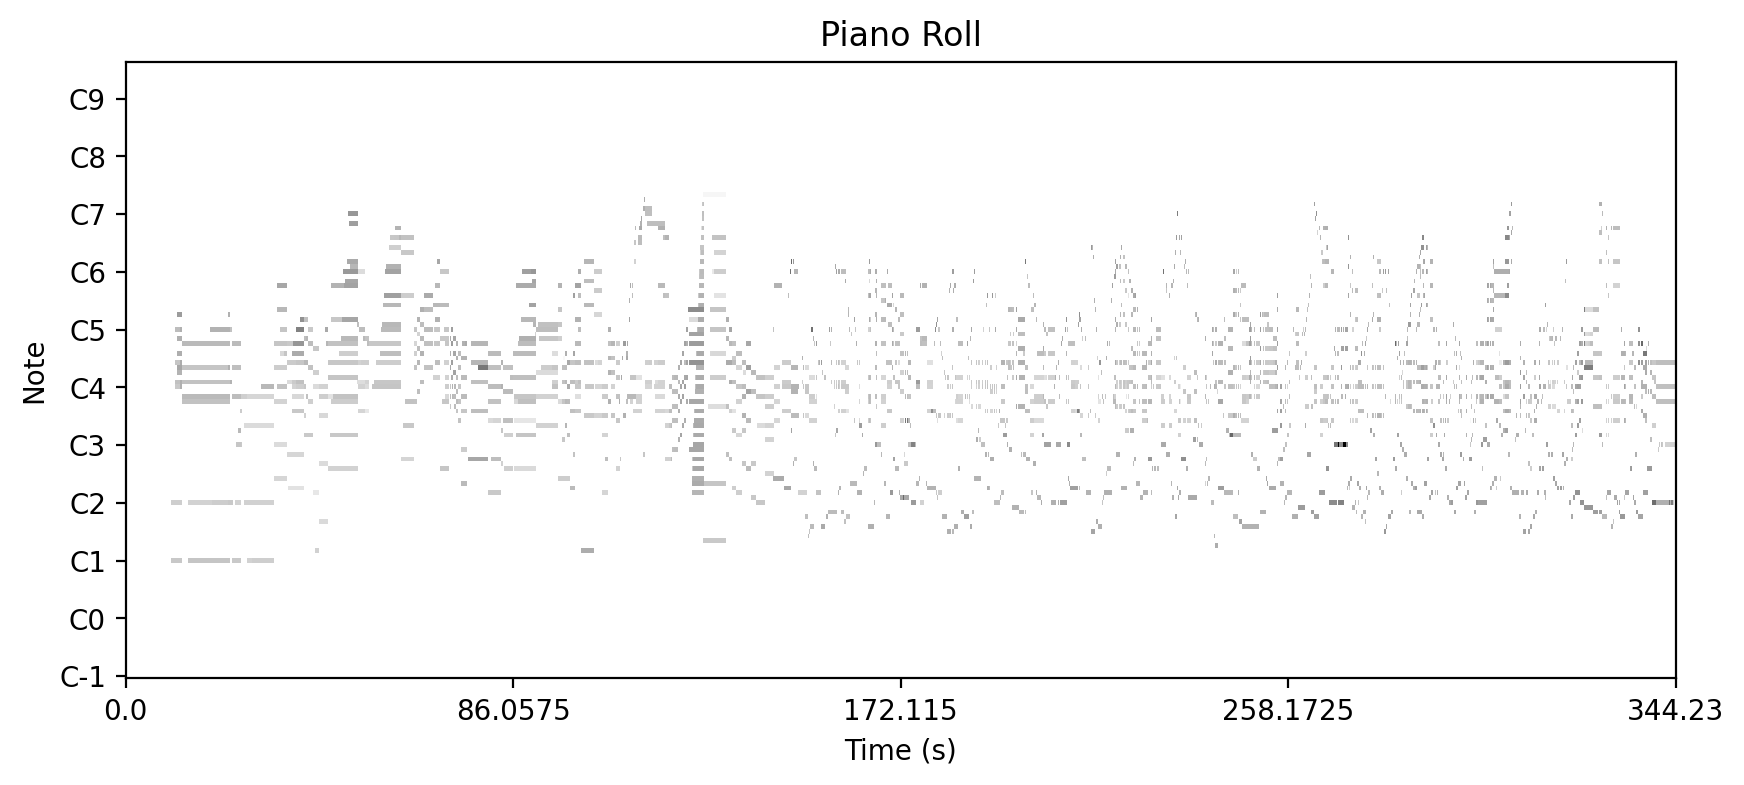

In [ ]:
plot_piano_roll('drive/MyDrive/Tesina/Dataset Final/DaysofWine.mid')

### Number of Instruments

In [ ]:
def plot_instrument_distribution(midi_data):
    # Create the countplot
    ax = sns.countplot(x='num_instruments', data=midi_data)
    plt.title('Distribution of Number of Instruments')

    # Adding values on top of the bars
    for p in ax.patches:
        # Get the height of the bar (which represents the data value)
        height = p.get_height()
        # Place a text label above the bar
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '%d' % int(height), ha='center')

    plt.show()

In [ ]:
midi_data['instruments'].unique()

array(['Acoustic Grand Piano', 'Bright Acoustic Piano',
       'Acoustic Bass, Violin, Acoustic Grand Piano',
       'Acoustic Bass, Acoustic Grand Piano',
       'Acoustic Bass, Electric Piano 1'], dtype=object)

In [ ]:
#Delete rows with other instruments that are not Acoustic Grand Piano
midi_data = midi_data[midi_data['instruments'] == 'Acoustic Grand Piano']

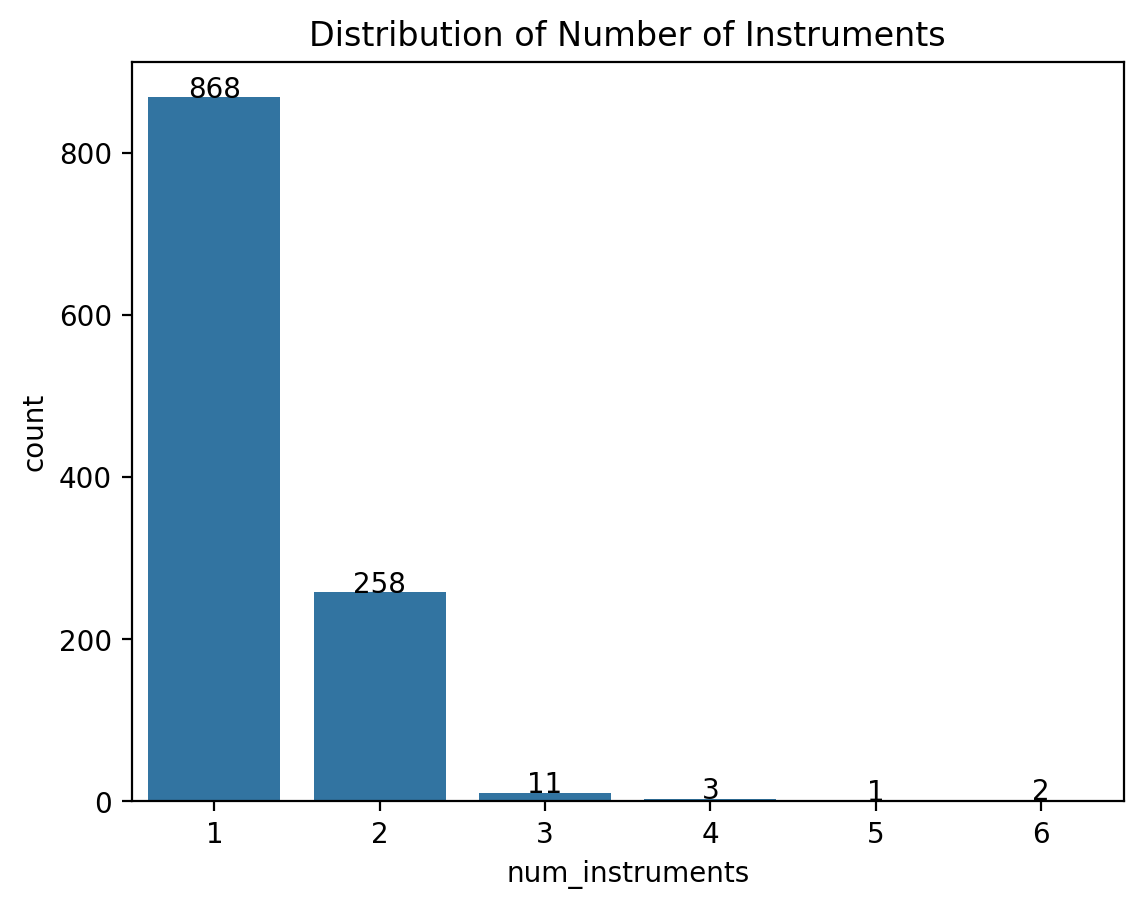

In [ ]:
plot_instrument_distribution(midi_data)

In [ ]:
midi_data['instruments'].unique()

array(['Acoustic Grand Piano'], dtype=object)

Instrument Number Analysis:

As we see in the graph above we contain 6 midi files where there is 3 or more instruments, we should only focus on the ones with two, so that the the model is not affected by other instruments instead of pianos

In [ ]:
#Delete rows with 3 or more instruments
midi_data = midi_data[midi_data['num_instruments'] <= 2]

In [ ]:
midi_data.head()

,filename,num_instruments,instruments,duration,tempo_changes,key_signatures,time_signatures,avg_pitch,min_pitch,max_pitch,avg_velocity,avg_duration,polyphony,avg_interval,pitch_classes,main_key,chords,notes
0,MIDI-Unprocessed_06_R1_2006_01-04_ORIG_MID--AU...,1,Acoustic Grand Piano,311.772135,1,0,1,65.184073,24,101,67.516482,0.118798,19.655381,0.050060,"[816, 241, 789, 185, 743, 584, 254, 776, 254, ...",C major,"60.64.69.81.72, 58.79, 57.86.91, 72.78.69.67, ...","(53,1.02,1.05,79) (31,1.01,1.05,88) (55,1.01,1..."
1,MIDI-Unprocessed_08_R1_2006_01-04_ORIG_MID--AU...,1,Acoustic Grand Piano,558.524740,1,0,1,67.498252,29,89,59.771713,0.307065,6.658613,0.148588,"[615, 281, 177, 194, 241, 555, 114, 388, 330, ...",F minor,"60.59, 53.46.56, 73.53.46, 77.80, 78.82, 61.49...","(53,1.03,1.81,26) (60,1.62,1.83,40) (56,1.01,1..."
2,MIDI-Unprocessed_07_R1_2006_01-04_ORIG_MID--AU...,1,Acoustic Grand Piano,691.899740,1,0,1,62.388428,29,89,54.308931,0.325905,5.745052,0.173441,"[447, 223, 440, 323, 245, 459, 353, 375, 238, ...",B- major,"73.46, 42.30, 50.34, 58.78.73, 53.70, 55.70.64...","(36,1.03,2.72,43) (48,1.02,3.07,45) (60,1.01,4..."
3,MIDI-Unprocessed_07_R2_2006_01_ORIG_MID--AUDIO...,1,Acoustic Grand Piano,670.898438,1,0,1,64.798807,29,100,58.951314,0.215625,9.245811,0.107599,"[513, 330, 609, 305, 1041, 323, 437, 387, 442,...",A minor,"86.81, 49.45, 60.59, 47.75, 60.52.57, 84.86.60...","(45,0.99,1.03,84) (49,0.98,1.04,88) (33,1.61,1..."
4,MIDI-Unprocessed_05_R1_2006_01-05_ORIG_MID--AU...,1,Acoustic Grand Piano,734.302083,1,0,1,63.873651,25,103,58.659170,0.209724,7.447888,0.132908,"[579, 555, 330, 591, 341, 415, 495, 423, 609, ...",E- minor,"62.58.53, 53.70, 68.61.63.42, 68.66.71.78, 78....","(57,0.43,0.46,61) (57,0.55,0.58,59) (61,0.66,0..."


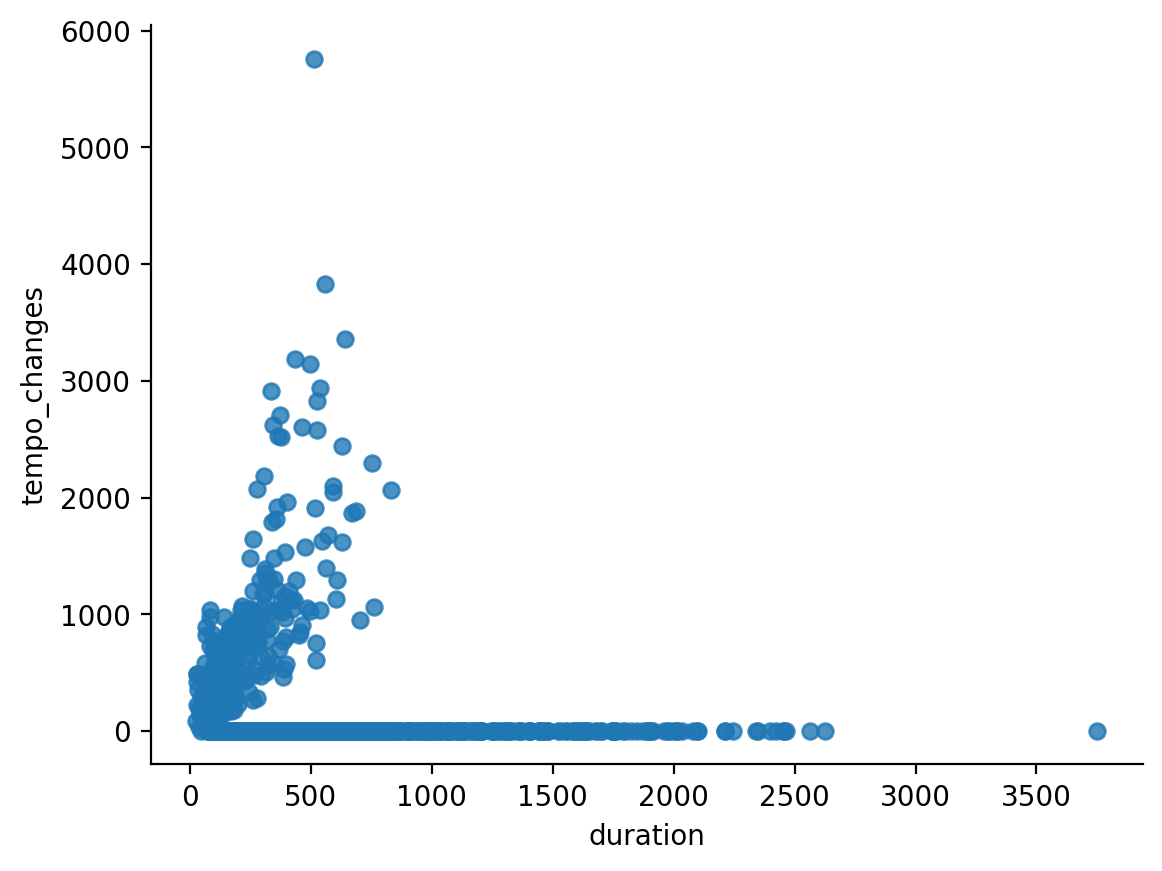

In [ ]:
# @title duration vs tempo_changes

from matplotlib import pyplot as plt
midi_data.plot(kind='scatter', x='duration', y='tempo_changes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

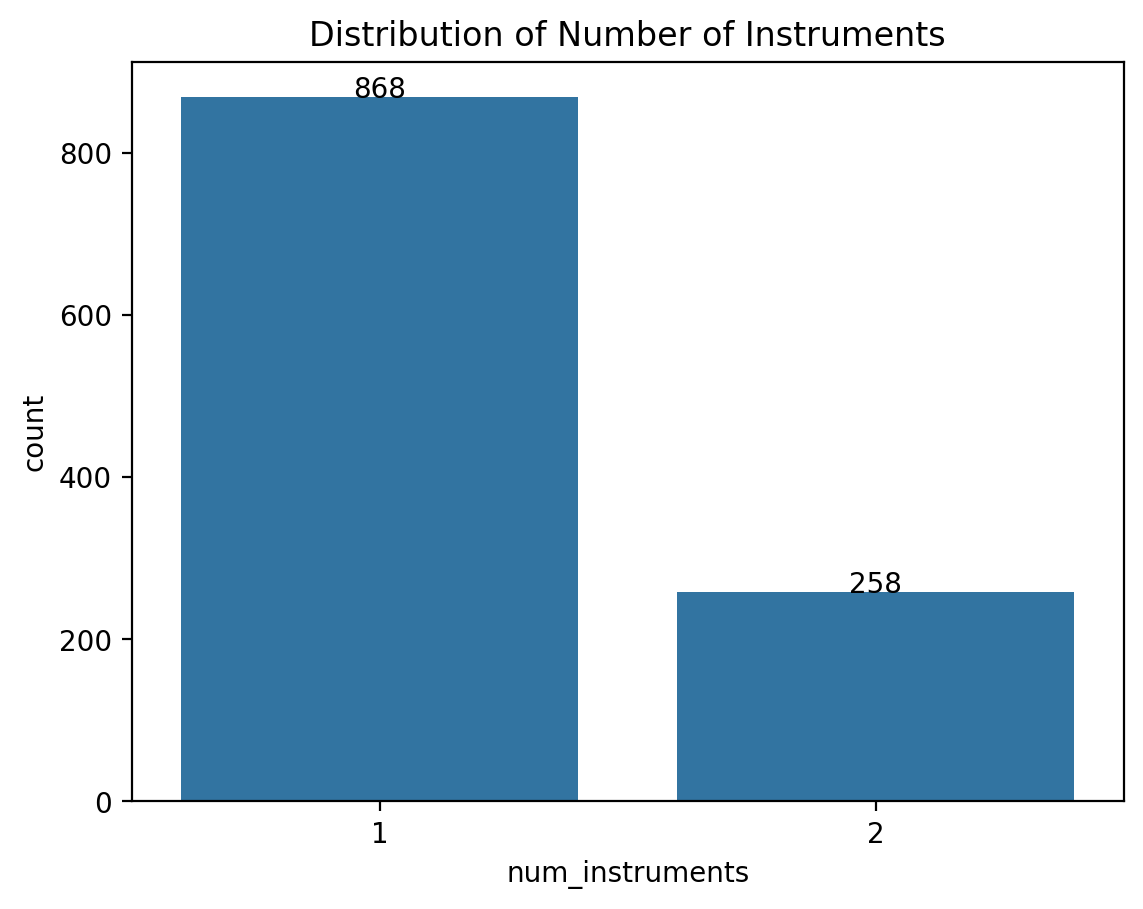

In [ ]:
plot_instrument_distribution(midi_data)

In [ ]:
#count how many different instruments are in the DF
midi_data['instruments'].nunique()

1

In [ ]:
#what are the different instruments
midi_data['instruments'].unique()

array(['Acoustic Grand Piano'], dtype=object)

In [ ]:
tota_notes= midi_data['notes'].apply(count_notes).sum()
#change format to be readable
tota_notes = "{:,}".format(tota_notes)
print(f"Total notes: {tota_notes}")

Total notes: 5,754,111


Now we have songs that contains only 2 or 1 instrument all of them being Acoustic Grand Piano

### Duration of the MIDI files

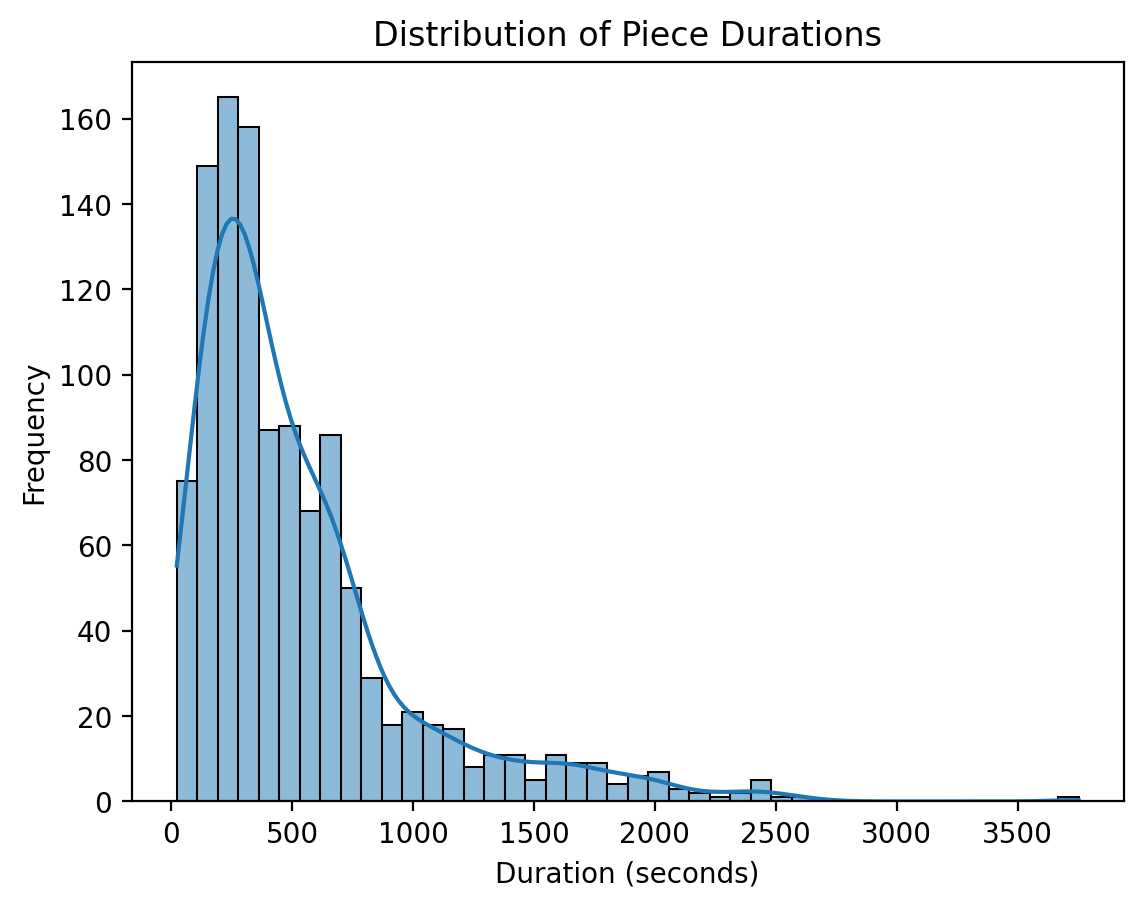

In [ ]:
# Histogram of durations
sns.histplot(midi_data['duration'], kde=True)
plt.title('Distribution of Piece Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

From the graph, we can infer several things that are useful for training an RNN for music generation:

1. **Most Common Durations**: The majority of pieces are concentrated in the lower range of durations, particularly between 0 to 500 seconds. Shorter pieces are more prevalent in our dataset.

2. **Duration Variability**: There are fewer pieces with longer durations, but they do exist, indicating there is some variability in the dataset. This is important for the model to learn if we want it to generate pieces with varying lengths. There are a few pieces with much longer durations, around 3000 seconds and above. These are  outliers, and we decide to eliminate this in order for the model to have a better training


In [ ]:
#DELETE OUTLIERS
midi_data = midi_data[midi_data['duration'] < 1000]

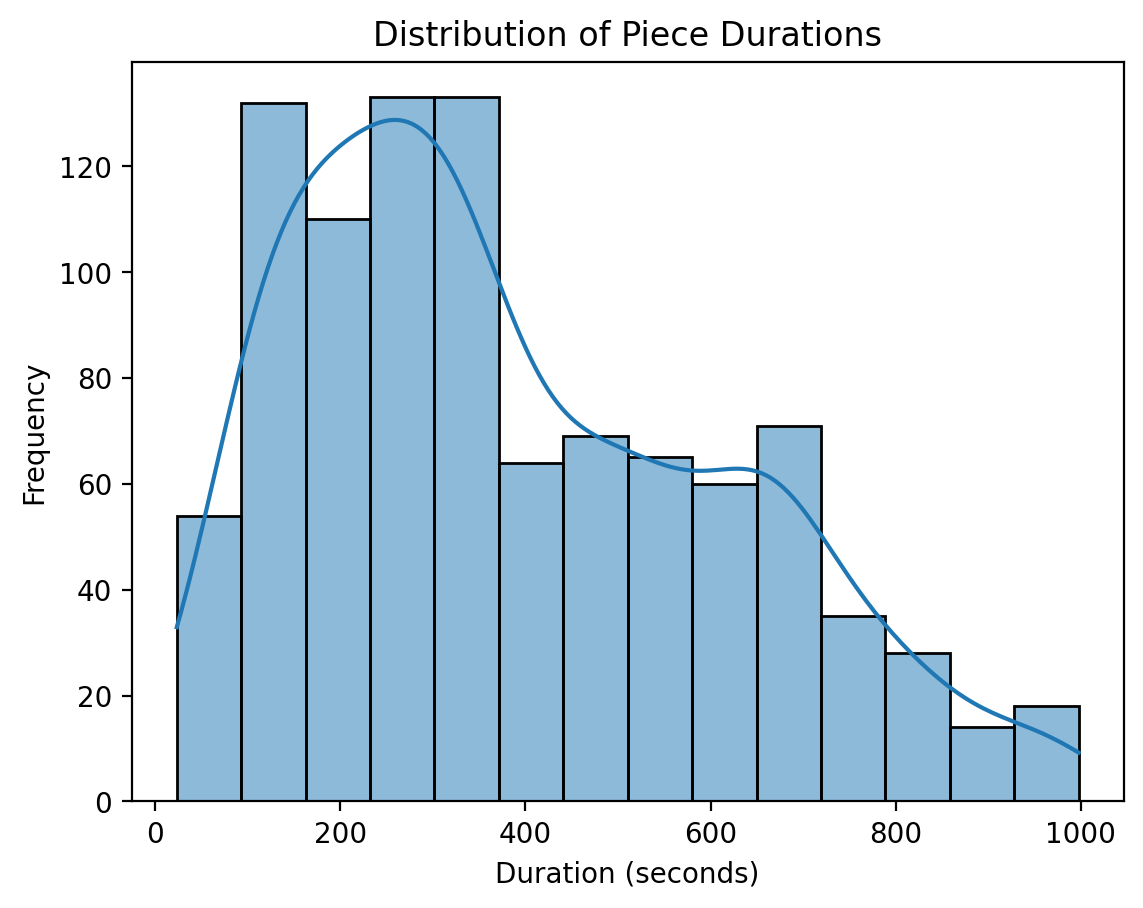

In [ ]:
# Histogram of durations
sns.histplot(midi_data['duration'], kde=True)
plt.title('Distribution of Piece Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

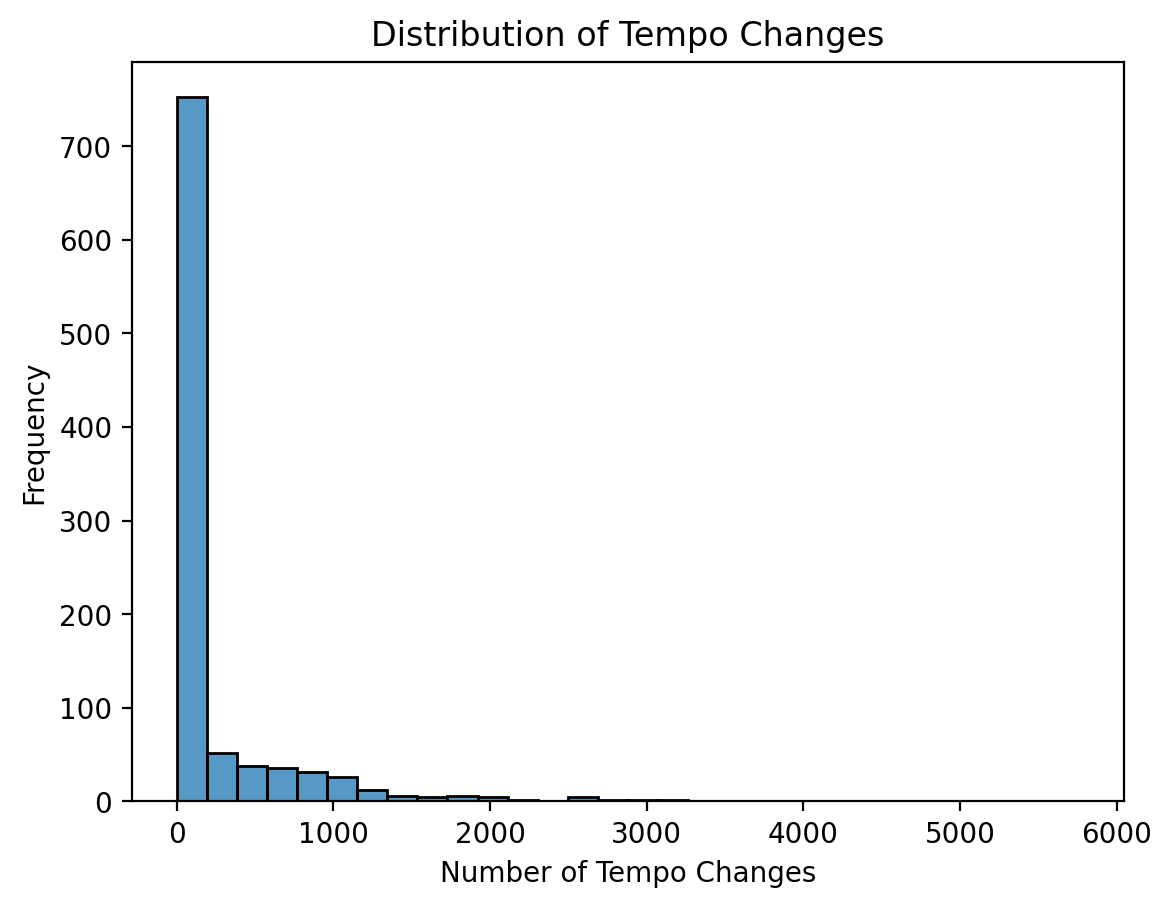

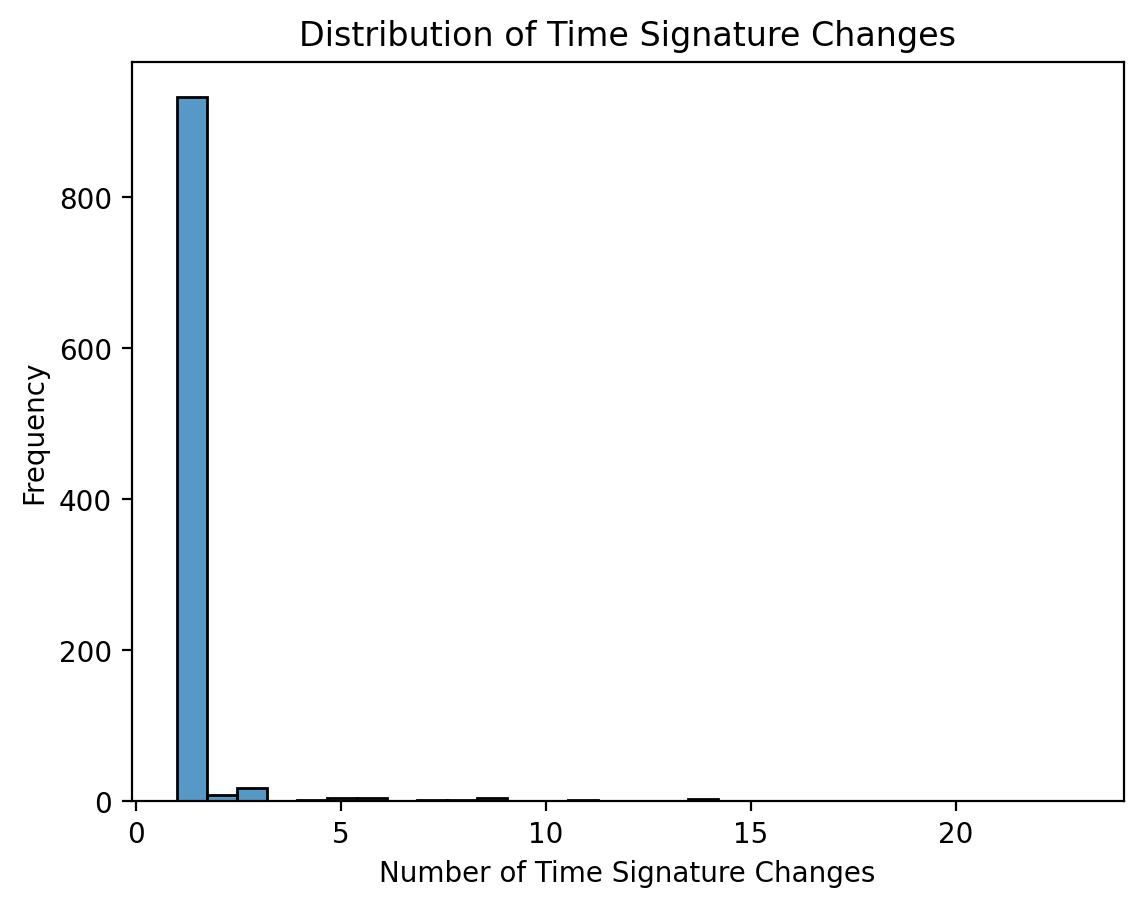

In [ ]:
# Histogram of tempo changes
sns.histplot(midi_data['tempo_changes'], bins=30)
plt.title('Distribution of Tempo Changes')
plt.xlabel('Number of Tempo Changes')
plt.ylabel('Frequency')
plt.show()

# Histogram of time signature changes
sns.histplot(midi_data['time_signatures'], bins=30)
plt.title('Distribution of Time Signature Changes')
plt.xlabel('Number of Time Signature Changes')
plt.ylabel('Frequency')
plt.show()

### Distribution of Tempo Changes

1. **Sparse Tempo Changes**: Most pieces have few or no tempo changes, with a large frequency at 0. This indicates that tempo tends to remain constant throughout most pieces.
2. **Few Variations**: There are some pieces with a higher number of tempo changes, but these are less common. This could suggest that these pieces are more complex or have more movement and variation in terms of speed.
3. **Outliers**: Pieces with an extremely high number of tempo changes (e.g., over 2500) are rare. These might be specific types of compositions or outliers that you may want to examine further.

### Distribution of Time Signature Changes

1. **Stable Time Signatures**: Similar to tempo, most pieces have a stable time signature with no changes throughout the piece, which is indicated by the high frequency at 0.
2. **Occasional Variability**: A small number of pieces do have time signature changes, but they are not common. This might reflect specific genres or compositional styles where time signature changes are a characteristic feature.
3. **Rare Complexity**: Very few pieces have a large number of time signature changes, suggesting that such complexity is not common in the dataset.


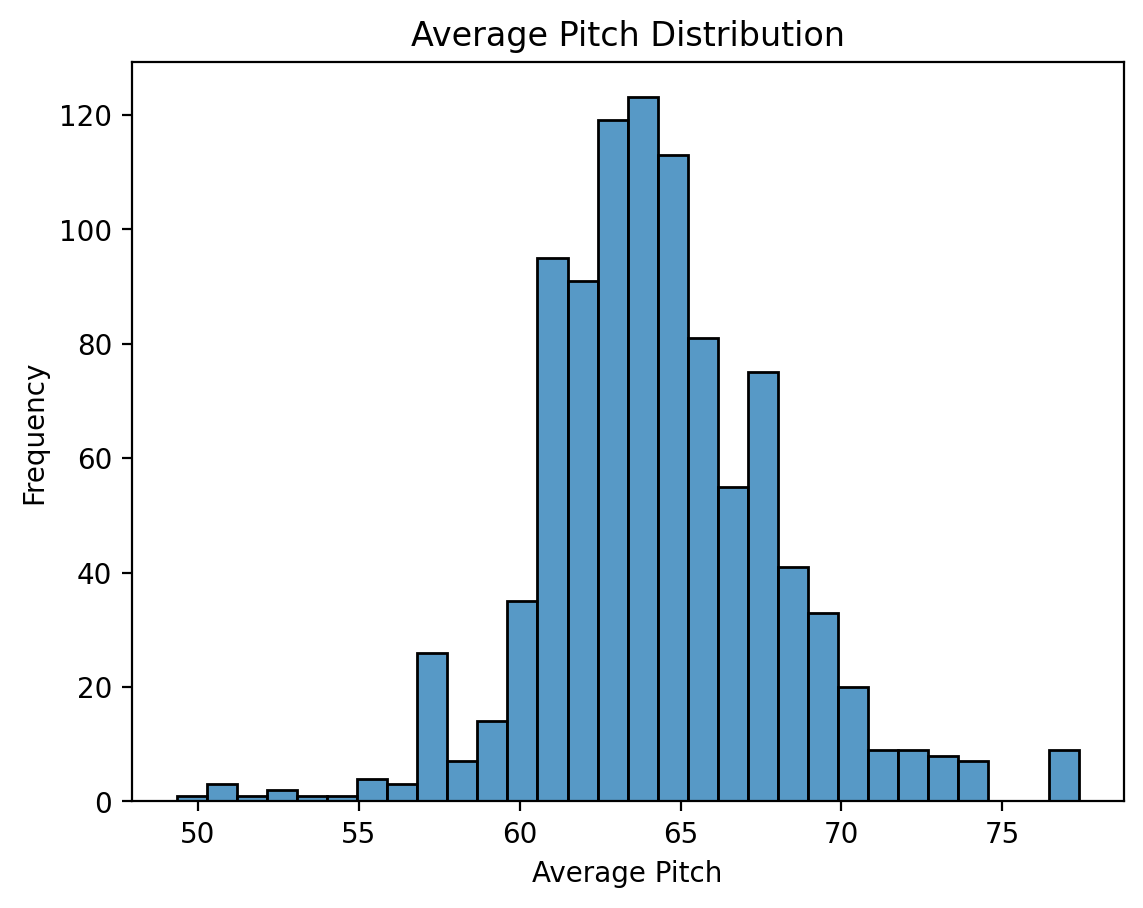

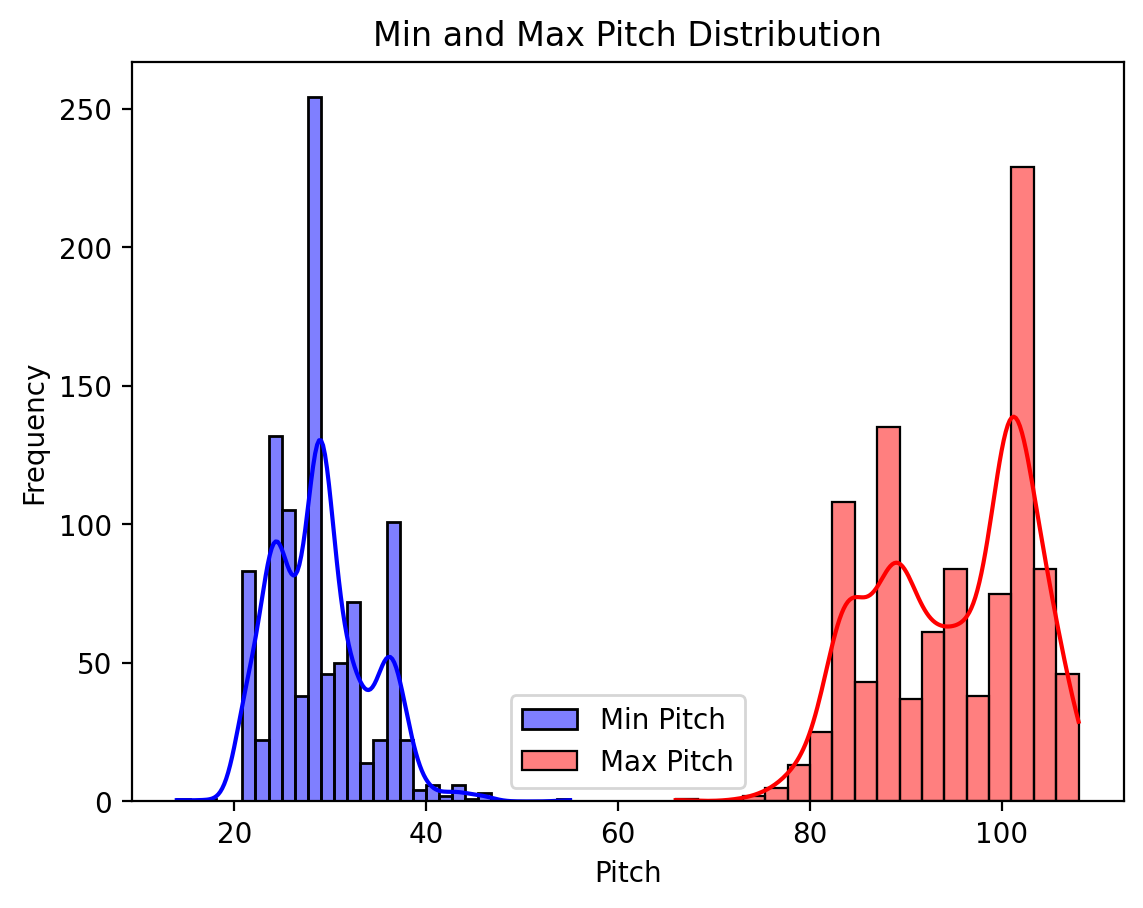

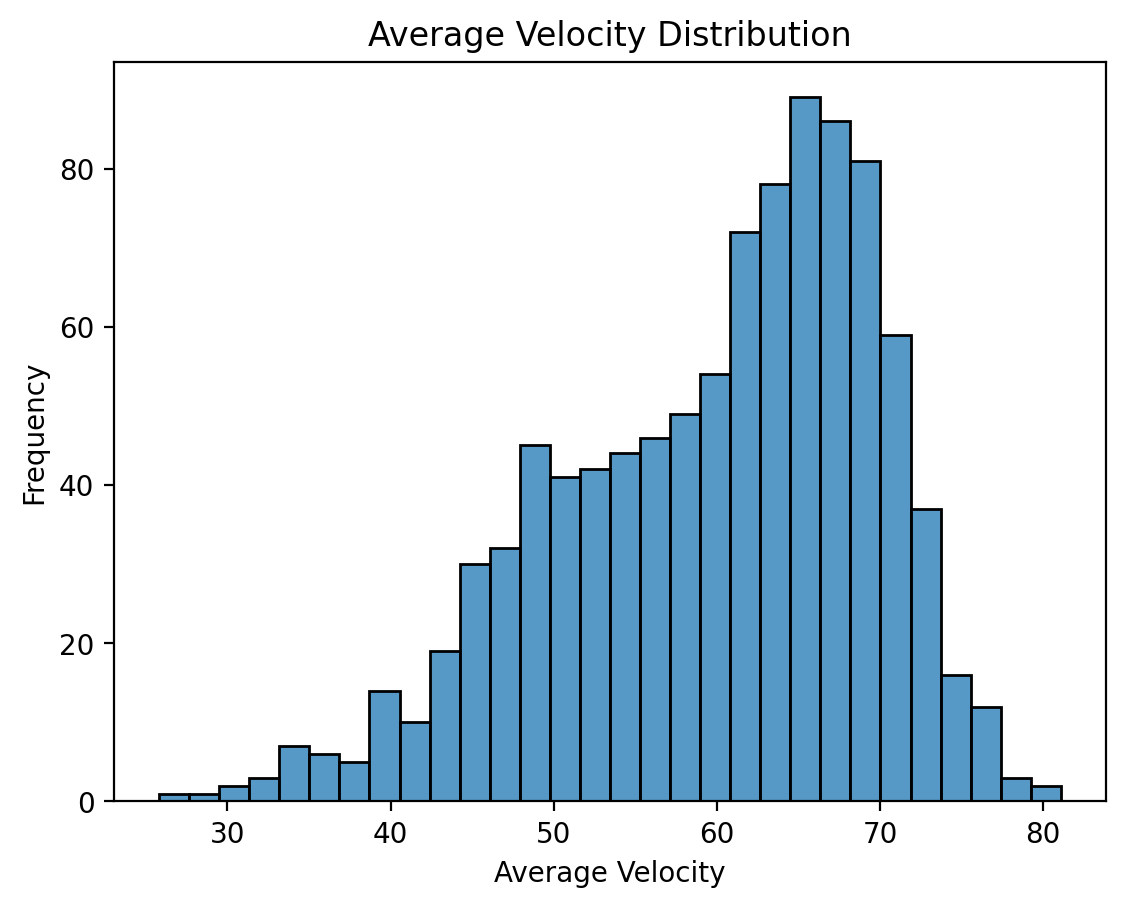

In [ ]:
# Average Pitch Distribution
sns.histplot(midi_data['avg_pitch'], bins=30)
plt.title('Average Pitch Distribution')
plt.xlabel('Average Pitch')
plt.ylabel('Frequency')
plt.show()

# Min and Max Pitch Distribution
sns.histplot(midi_data['min_pitch'], color='blue', label='Min Pitch', kde=True)
sns.histplot(midi_data['max_pitch'], color='red', label='Max Pitch', kde=True)
plt.legend()
plt.title('Min and Max Pitch Distribution')
plt.xlabel('Pitch')
plt.ylabel('Frequency')
plt.show()

# Average Velocity Distribution
sns.histplot(midi_data['avg_velocity'], bins=30)
plt.title('Average Velocity Distribution')
plt.xlabel('Average Velocity')
plt.ylabel('Frequency')
plt.show()


### Average Pitch Distribution

- **Central Tendency**: The distribution appears to be somewhat uniform with multiple peaks, suggesting there isn't a single average pitch that dominates your dataset.
- **Range**: The average pitch values are spread out between 58 and 70, which corresponds to around the range of Bb1 to C#5 in scientific pitch notation. This suggests a mid-range concentration of pitches for your average values.

### Min and Max Pitch Distribution

- **Min Pitch**: The minimum pitch values are concentrated around the lower range (20-40), which suggests that most pieces have their lowest notes within the bass or lower tenor range.
- **Max Pitch**: The maximum pitch values are more spread out but have concentrations at both the lower and higher ranges. This indicates a variety in the highest notes across pieces, from mid-range to soprano pitches.

### Average Velocity Distribution

- **Variability in Dynamics**: The histogram shows a spread of average velocity values with several peaks. This implies variability in the dynamics across pieces, with no single dynamic level being overly dominant.
- **Mid-Range Dynamics**: Most pieces have an average velocity (dynamics) around the mid-range, indicating that neither very soft nor very loud dynamics overly dominate the dataset.

### Implications for RNN Music Generation:

- **Pitch Representation**: The RNN will need to learn a range of pitches that reflect the spread seen in the average pitch distribution. It should not bias towards any specific pitch range.
  
- **Dynamic Range**: The model should be able to generate notes with a range of dynamics, as indicated by the spread in the average velocity distribution.
  
- **Note Range**: The RNN should be capable of generating music that reflects the min and max pitch distributions, ensuring that compositions have realistic and varied pitch ranges.

- **Melodic Contour**: Given the spread of average pitches, the model should be trained to understand the contour of melodies which may not stick to a narrow pitch range.
  
- **Expressiveness**: The dynamics (velocity) of the music are an important part of its expressiveness. The model should learn to vary dynamics to reflect the diversity found in the dataset.

By ensuring your RNN considers the range and diversity of pitch and dynamics represented in your dataset, the generated music will likely be more varied and interesting, offering a more authentic and engaging listening experience.

In [ ]:
# Aggregate pitch class distributions from all files
total_pitch_classes = [0] * 12
for pc in midi_data['pitch_classes']:
    for i in range(12):
        total_pitch_classes[i] += pc[i]

# Plotting
fig, ax = plt.subplots()
ax.bar(range(12), total_pitch_classes)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_title('Pitch Class Distribution Across Dataset')
ax.set_ylabel('Frequency')
plt.show()


TypeError: unsupported operand type(s) for +=: 'int' and 'str'

The bar chart shows the frequency distribution of pitch classes across our dataset. Pitch classes refer to the set of all pitches that are a whole number of octaves apart, so in this context, C includes all C notes across all octaves, C# includes all C# notes, and so on.

Here are some conclusions we can draw from this chart:

1. **Pitch Preferences**: Some pitch classes are more frequently used than others. For instance, pitches C, D, and A seem to be used more often than other pitch classes like E and B. This could reflect a preference for certain keys or intervals in the compositions.

2. **Tonality**: The distribution might indicate a common tonality within the dataset. If C is the most frequent pitch class, the pieces might often be in keys related to C major or A minor (given that A is also quite common).

3. **Compositional Styles**: The frequency of certain pitch classes might reflect compositional styles or genre-specific tendencies. For example, jazz might have more chromatic notes, whereas folk music might center around a major scale with less chromaticism.

For your RNN model used for music generation:

- **Diversity of Learning**: Ensure the model learns from the variety of pitches. It might need to capture less frequent pitch classes to create a diverse range of music.
  
- **Model Bias**: Be cautious of any bias towards the more frequent pitch classes, which could lead your model to overuse them in generated compositions.
  
- **Key Signature Consideration**: When training the model, consider key signature as a feature, especially if the frequency of pitch classes suggests a bias towards certain keys.
  
- **Harmonization**: The RNN might learn to harmonize melodies using the most common pitch classes. Including a diverse set of harmonies in training could encourage more creativity in the model's output.

This graph gives a good indication of the melodic tendencies in your dataset, which can significantly influence the character and diversity of the music generated by your RNN.

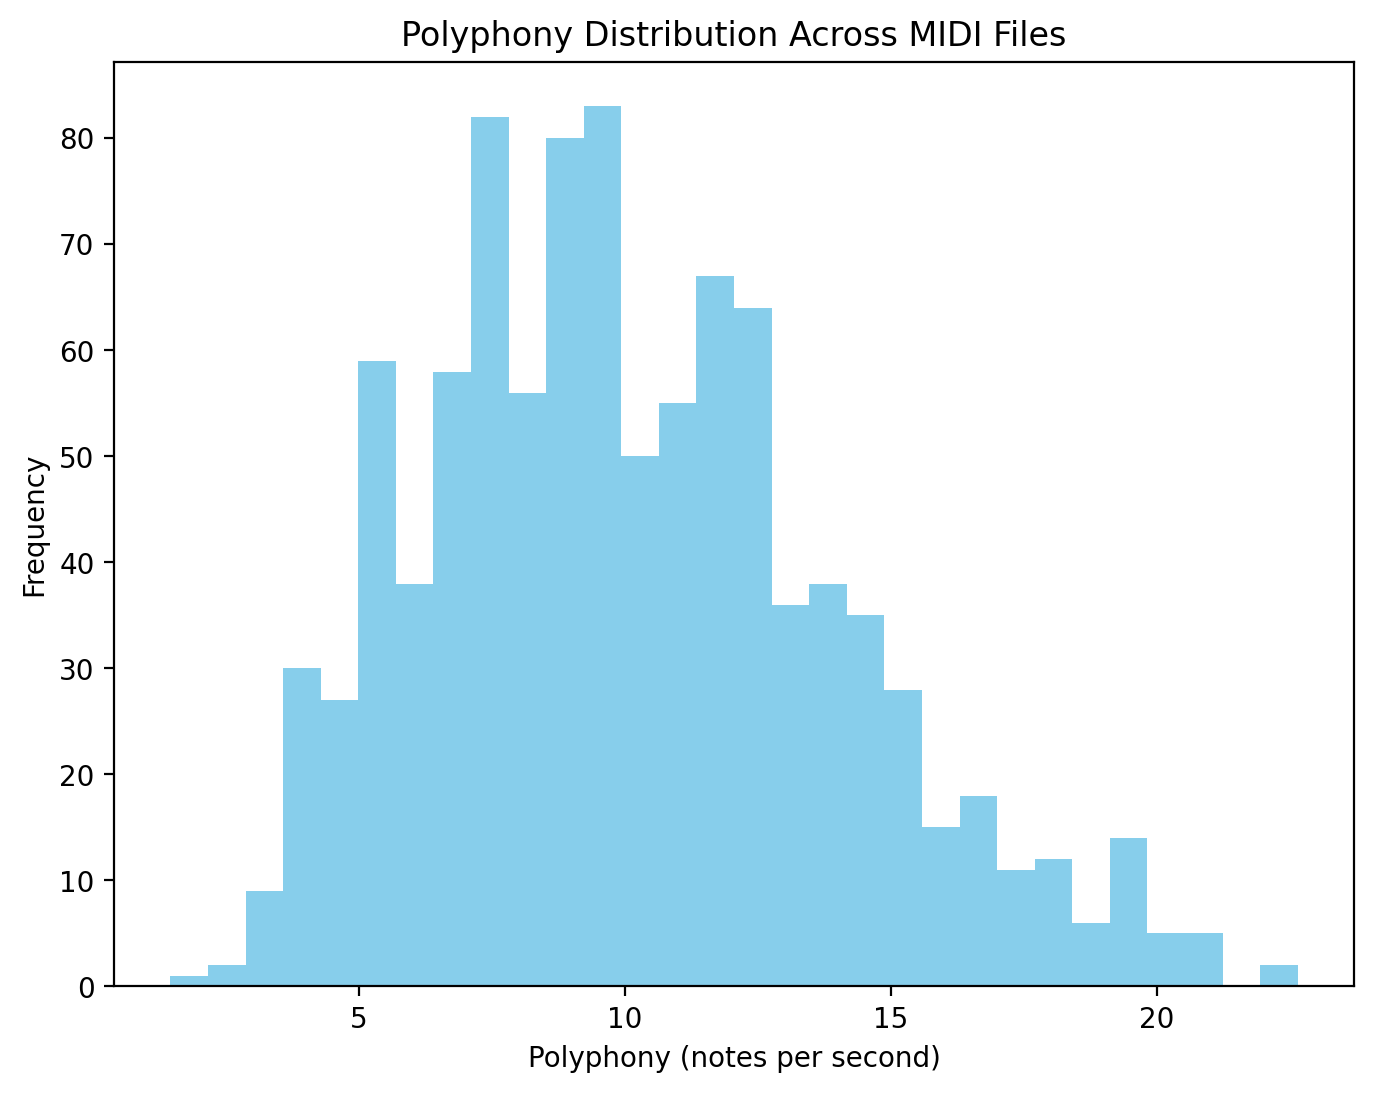

In [ ]:
# Plotting the distribution of polyphony
plt.figure(figsize=(8, 6))
plt.hist(midi_data['polyphony'], bins=30, color='skyblue')
plt.title('Polyphony Distribution Across MIDI Files')
plt.xlabel('Polyphony (notes per second)')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of polyphony across MIDI files in our dataset, measured as the number of notes played per second. Here's what we can conclude:

1. **Variety in Texture**: The distribution indicates that there's a variety of textural complexity in the dataset. Pieces range from less polyphonic (simpler textures with fewer notes per second) to more polyphonic (complex textures with more notes per second).

2. **Most Common Polyphony**: There seems to be a concentration of pieces with a polyphony level around 8 to 10 notes per second, suggesting that this is a common texture in the dataset.

3. **Rare Complex Textures**: Higher levels of polyphony (14 notes per second and beyond) are less common. This could indicate either the presence of complex passages within otherwise simpler pieces or a few pieces that are consistently complex throughout.

In the context of training an RNN for music generation:

- **Learning Textural Diversity**: Your model should be exposed to a range of polyphonic textures during training to learn how to generate both simple and complex textures.

- **Balancing the Dataset**: If your goal is to generate music with a similar polyphonic distribution, ensure that the training data is not biased towards a specific polyphony level, unless that bias reflects your desired output.

- **Complexity Handling**: The model might need to be more sophisticated (e.g., with more LSTM layers or units) to capture and generate the complexity seen in the more polyphonic pieces.

- **Representation of Polyphony**: Make sure your data representation allows the model to discern between simultaneous notes and sequential notes, as this is key to learning polyphonic structures.

This graph provides insights into the textural characteristics of the music in your dataset, which can guide the design and training of your RNN to ensure it can generate music with a similar range of polyphonic complexity.

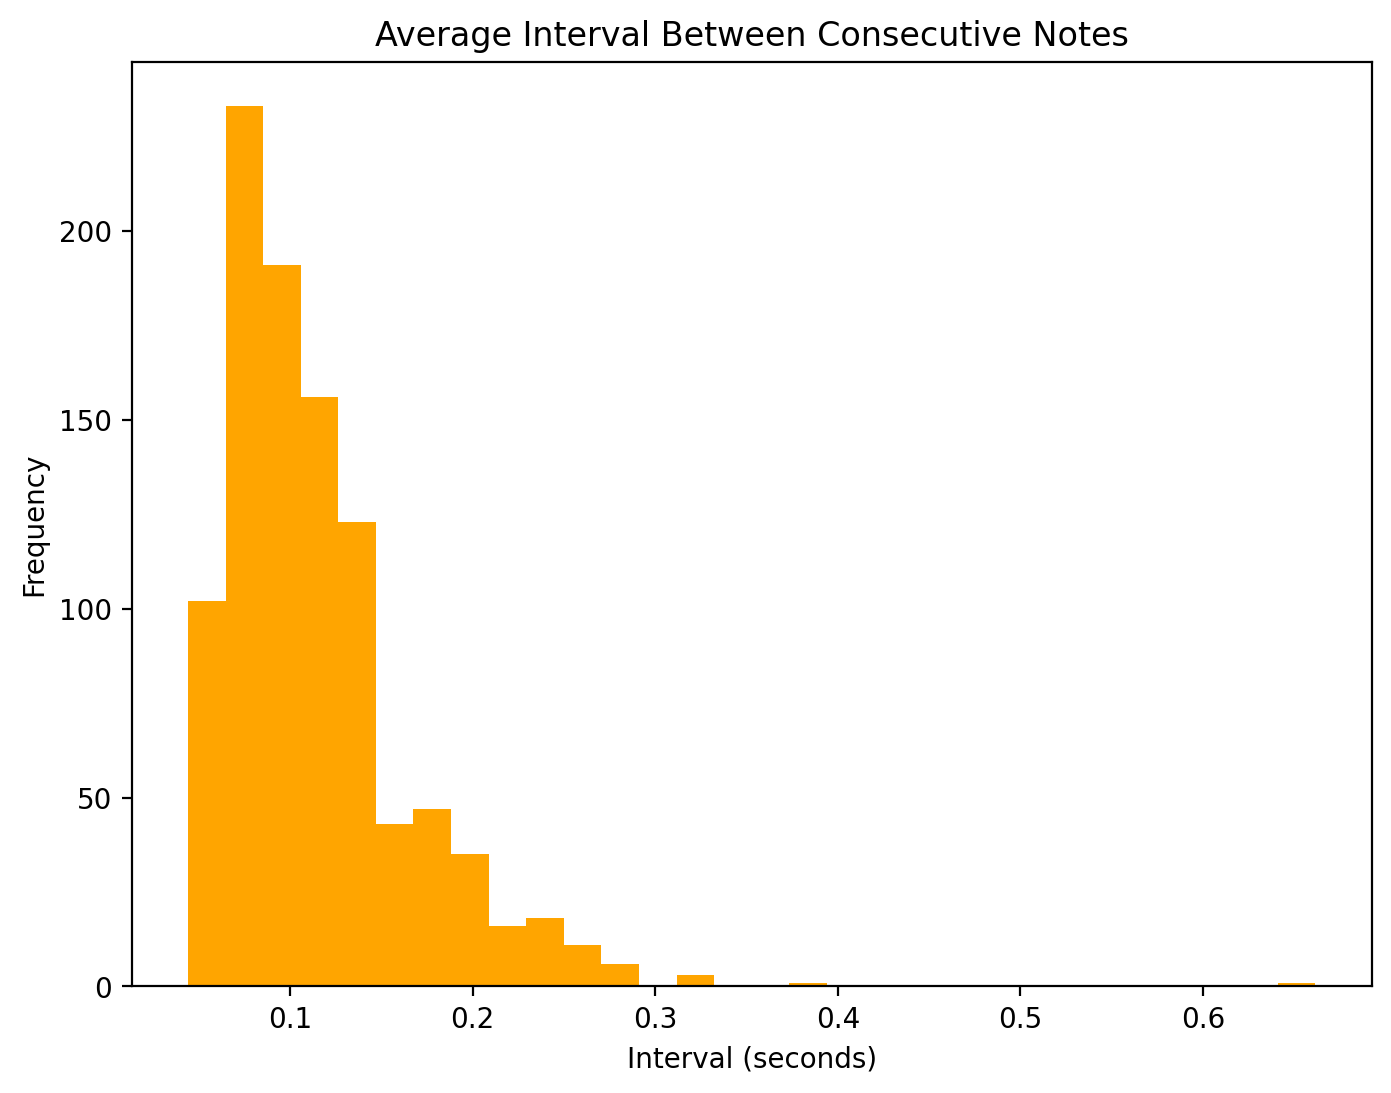

In [ ]:
# Plotting the average interval between consecutive notes
plt.figure(figsize=(8, 6))
plt.hist(midi_data['avg_interval'], bins=30, color='orange')
plt.title('Average Interval Between Consecutive Notes')
plt.xlabel('Interval (seconds)')
plt.ylabel('Frequency')
plt.show()


The histogram depicts the distribution of the average interval between consecutive notes across MIDI files:

1. **Note Density**: Most pieces have an average interval between notes that is fairly short, mostly clustered around 0.10 to 0.15 seconds. This suggests a higher density of notes or faster rhythmic pacing in most of the music.

2. **Rhythmic Variation**: There's a spread of intervals up to 0.40 seconds, indicating some variety in rhythmic pacing. However, intervals longer than 0.20 seconds become increasingly less common.

For an RNN aimed at music generation:

- **Rhythmic Training**: The model should learn to generate notes with the more common shorter intervals to reflect the predominant rhythm patterns in the dataset.
- **Temporal Diversity**: It's also important for the RNN to capture the less common longer intervals for diversity in generated rhythms.
- **Time Step Consideration**: When designing the RNN, the time step should allow the network to capture the finer details of timing between notes, which means it should be shorter than the shortest interval in your data.
- **Expressiveness**: The variation in intervals could be related to expressive timing in performance, which is something the RNN may need to replicate for realistic music generation.

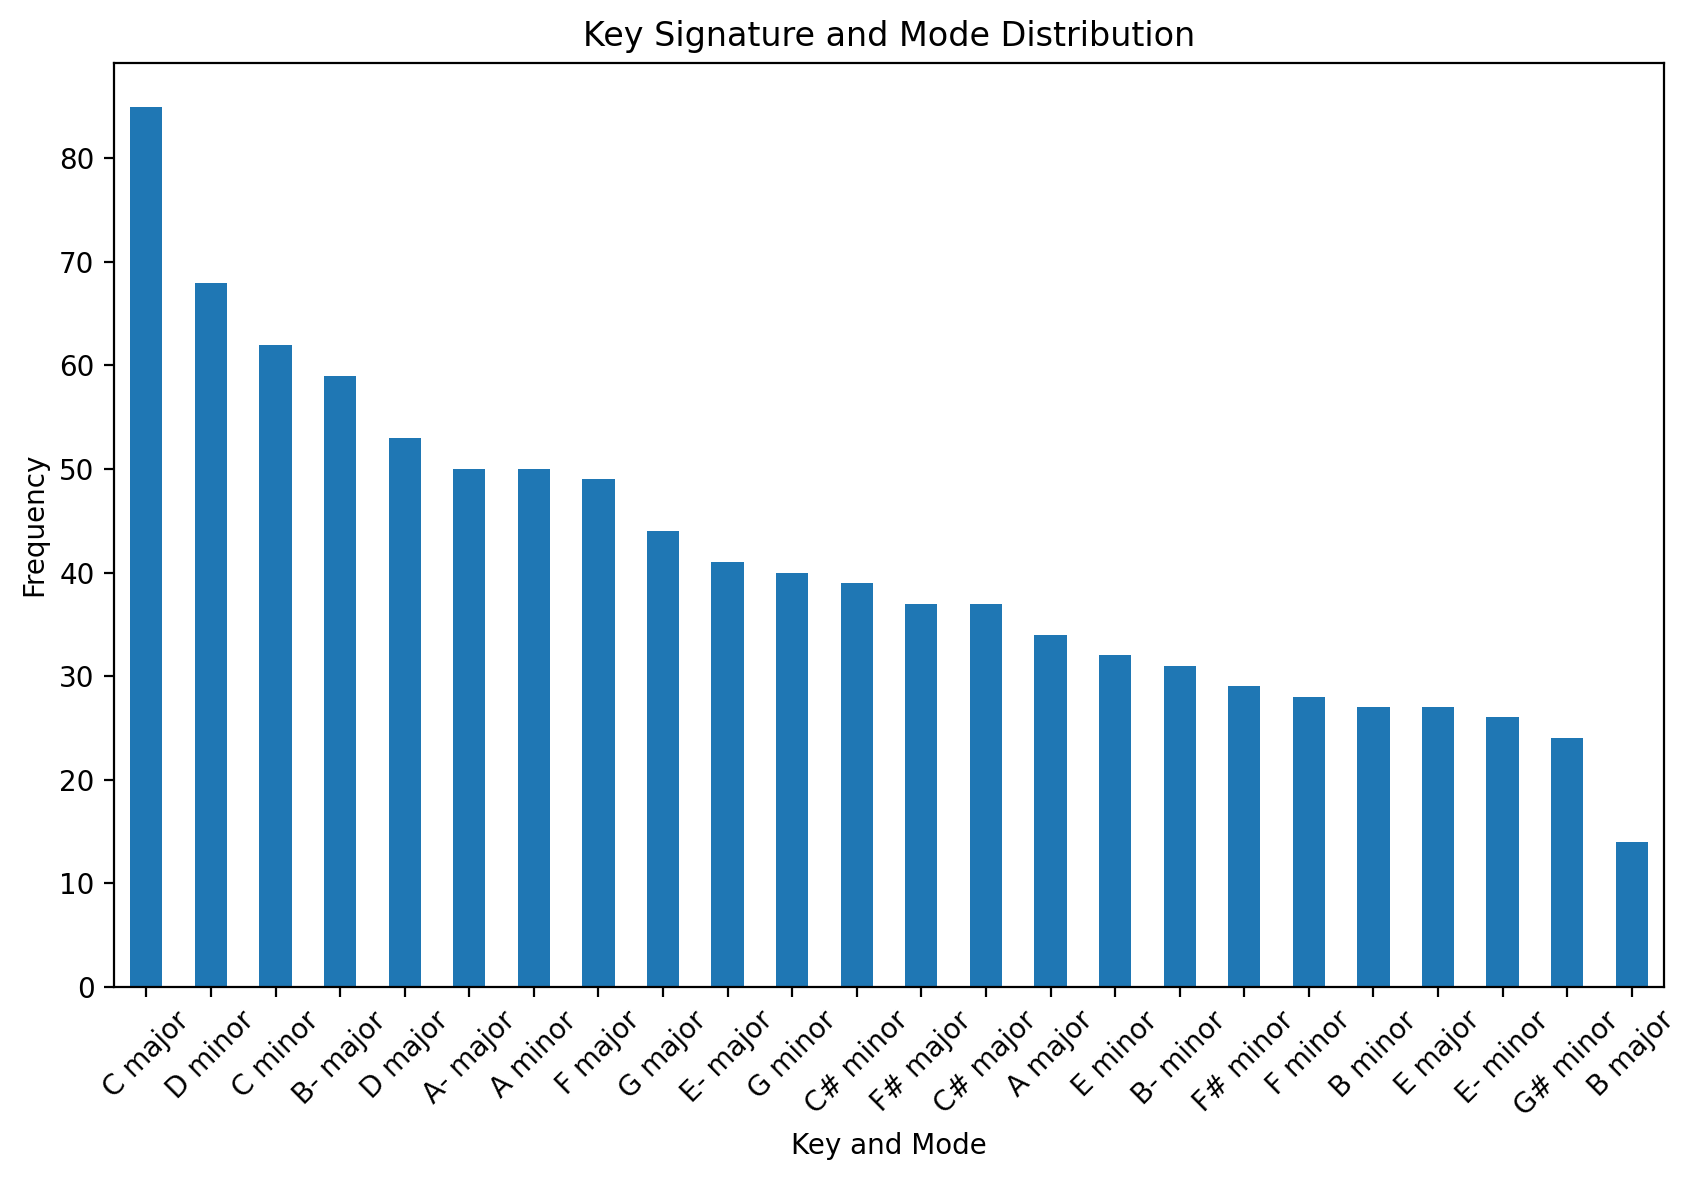

In [ ]:
# Extracting key signatures and modes
keys = midi_data['main_key'].value_counts()

# Plotting
keys.plot(kind='bar', figsize=(10, 6))
plt.title('Key Signature and Mode Distribution')
plt.xlabel('Key and Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


One of the main objectives of our model is to be able to generate a broad spectrum of music. So better for the model to have a broad number of keys and modes

The bar chart shows the frequency of various key signatures and modes in your dataset. From this, we can draw several conclusions:

1. **Key Popularity**: D major and F major are the most common keys, followed by C major and A major. This could indicate a preference for compositions in these keys within the dataset.

2. **Mode Distribution**: Major keys appear more frequently than minor keys, suggesting that the dataset may have a bias towards music with a major tonality, which is typically perceived as happier or brighter compared to the often sadder or more serious minor tonality.

3. **Musical Variety**: While some keys are clearly favored, there is representation across a range of key signatures and modes, indicating diversity in the dataset. However, some keys, like F# minor and A# minor, are less common, which could reflect their relative rarity in the repertoire or possibly the dataset's genre bias.

4. **Data Representation for Modeling**: For an RNN tasked with generating music, it's crucial that the model is exposed to a variety of keys during the training process to ensure that it doesn't overfit to the most common keys and is able to generalize and create music in any key.

5. **Transposition**: To prevent overfitting to certain keys and to ensure that the model can generalize well, you may consider transposing pieces into different keys as a form of data augmentation.

6. **Dataset Balance**: If the goal is to generate music that doesn't have a strong bias towards a particular key or set of keys, you may need to balance the dataset either by collecting more data in underrepresented keys or by using a weighted sampling method during training.

This distribution provides valuable insights into the tonal characteristics of the dataset and can help in making informed decisions about data preprocessing and model training for a music generation RNN.

In [ ]:
# Extracting key signatures and modes
keys = midi_data['main_key'].value_counts()

print(keys)
print(sum(keys))


main_key
C major     85
D minor     68
C minor     62
B- major    59
D major     53
A- major    50
A minor     50
F major     49
G major     44
E- major    41
G minor     40
C# minor    39
F# major    37
C# major    37
A major     34
E minor     32
B- minor    31
F# minor    29
F minor     28
B minor     27
E major     27
E- minor    26
G# minor    24
B major     14
Name: count, dtype: int64
986


In [ ]:
from collections import Counter

In [ ]:

# Assuming `chords` column contains strings of unique chords separated by commas
midi_data['chord_list'] = midi_data['chords'].apply(lambda x: x.split(', '))

# Chord Frequency Distribution
all_chords = [chord for sublist in midi_data['chord_list'] for chord in sublist]
chord_counts = Counter(all_chords)
most_common_chords = chord_counts.most_common(10)  # Adjust as needed

# Plotting the most common chords
plt.figure(figsize=(10, 6))
plt.bar([chord[0] for chord in most_common_chords], [chord[1] for chord in most_common_chords])
plt.xlabel('Chord')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Chords')
plt.show()

# Chord Diversity per Piece
midi_data['unique_chords_count'] = midi_data['chord_list'].apply(len)
plt.figure(figsize=(10, 6))
midi_data['unique_chords_count'].hist(bins=20)
plt.xlabel('Number of Unique Chords')
plt.ylabel('Number of Pieces')
plt.title('Distribution of Unique Chords per Piece')
plt.show()

AttributeError: 'float' object has no attribute 'split'

### Top 10 Most Common Chords
The first histogram displays the top 10 most common chords found in your dataset:

1. **Common Chord Preference**: There are a few chords that are clearly more prevalent than others. These chords likely represent common harmonic progressions in the genre(s) of music you're analyzing.
2. **Harmonic Diversity**: The distribution seems fairly even among these top chords, indicating there is no single chord that overwhelmingly dominates the dataset.

### Distribution of Unique Chords per Piece
The second histogram shows the number of unique chords used per music piece:

1. **Chord Variety**: Most pieces have a relatively low number of unique chords, suggesting a tendency towards simpler harmonic structures.
2. **Complex Harmonic Structures**: There are a few pieces with a very high number of unique chords, indicating more complex harmonic structures. These pieces could be from specific genres that favor intricate chord progressions or pieces that are longer and thus have more room for varied chord progressions.

For an RNN tasked with music generation:

- **Harmonic Simplicity**: If the RNN is trained predominantly on pieces with fewer unique chords, it may learn to generate music that has simpler harmonic structures, which could be desirable for certain genres.
- **Harmonic Complexity**: The presence of pieces with many unique chords suggests that it would also be beneficial for the RNN to learn from these examples to generate more complex and interesting harmonic progressions.
- **Genre Representation**: Ensure the training dataset represents the genre(s) you wish to generate music for. If you want more complex music, you may need to ensure the RNN has enough examples of such pieces.
- **Diversity in Generation**: To prevent the RNN from overfitting to the most common chords, consider introducing randomness or encouraging exploration during training so that it learns to use a variety of chords in its compositions.

In conclusion, your dataset contains a mix of harmonic simplicity and complexity, which should inform the way you train your RNN for music generation. If you wish to generate music that is representative of the dataset's diversity, your model should be exposed to the full range of harmonic structures present in the training data.

In [ ]:

def plot_descriptive_statistics(data):
    desc_stats = data.describe().transpose()
    print(desc_stats[['mean', 'std', '50%', 'min', 'max']])

    # Conclusions can be drawn by observing the mean, standard deviation, and median values to understand the central tendency
    # and dispersion of the data. Min and max values help id

In [ ]:
plot_descriptive_statistics(midi_data)

                       mean         std         50%        min          max
num_instruments    1.261663    0.439763    1.000000   1.000000     2.000000
duration         386.397909  229.689537  332.124479  23.343477   997.492188
tempo_changes    222.075051  532.372867    1.000000   1.000000  5758.000000
key_signatures     0.595335    1.451601    0.000000   0.000000    16.000000
time_signatures    1.283976    1.654554    1.000000   1.000000    23.000000
avg_pitch         64.332550    3.700073   64.127637  49.343878    77.367489
min_pitch         28.914807    5.015392   29.000000  14.000000    55.000000
max_pitch         94.819473    7.919895   96.000000  66.000000   108.000000
avg_velocity      59.878267    9.743267   62.014117  25.805295    81.079620
avg_duration       0.267098    0.182247    0.212607   0.053905     1.585737
polyphony         10.130646    3.850045    9.665182   1.454365    22.653127
avg_interval       0.114057    0.052250    0.102362   0.044075     0.661615


In [ ]:
def plot_correlations(data):

    corr = data.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')

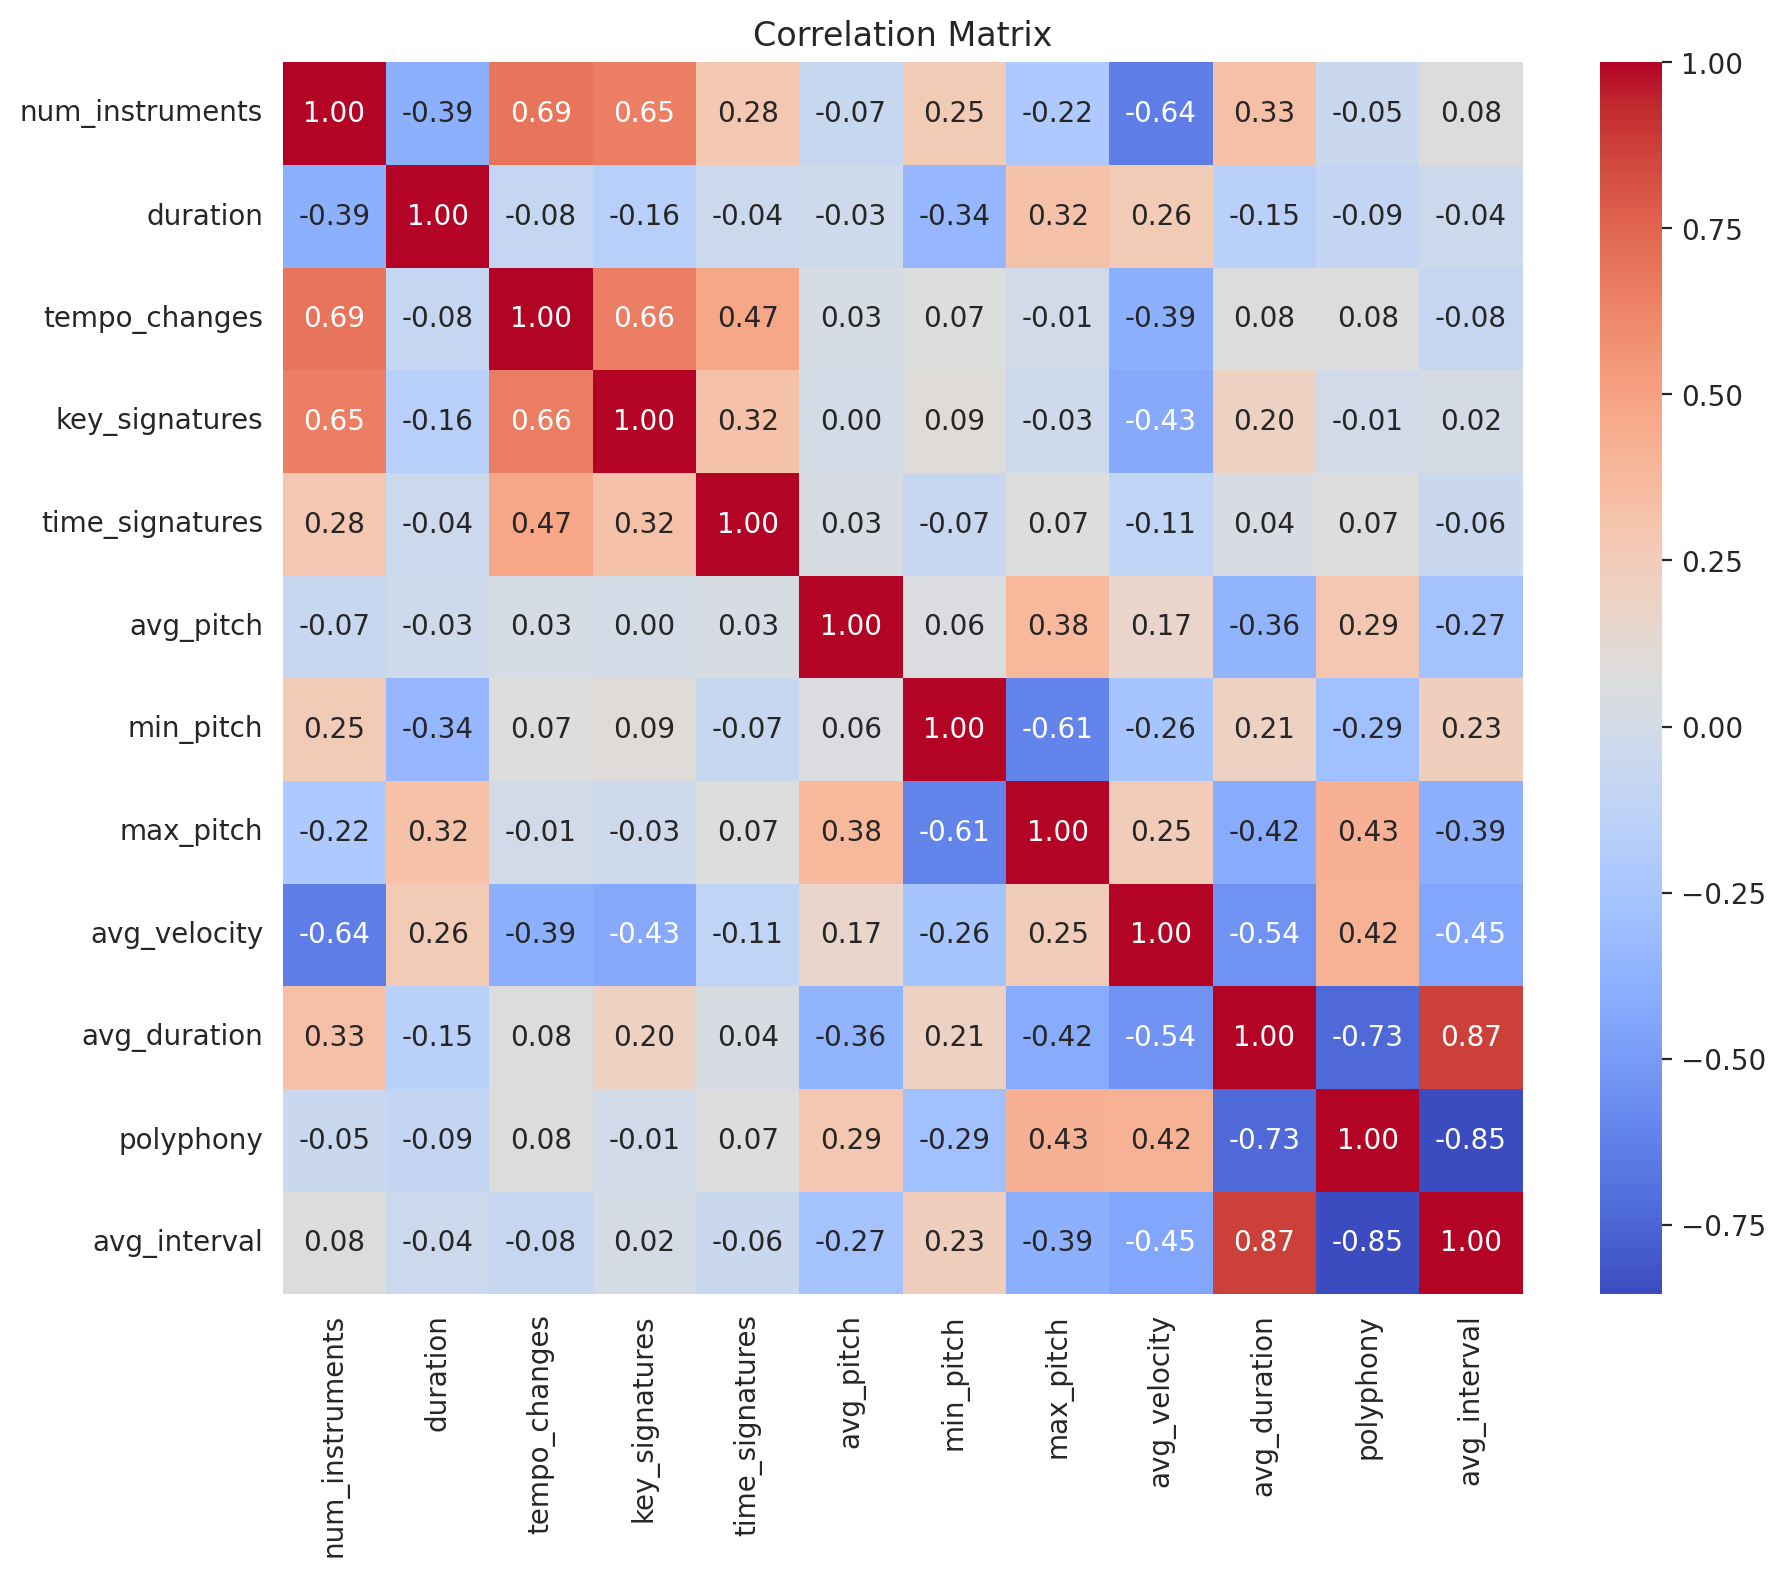

In [ ]:
plot_correlations(midi_data)

Based on the correlation matrix, here are some conclusions we can draw:

1. **Negative Correlations**:
    - `num_instruments` and `avg_pitch`: A slight negative correlation (-0.25) suggests that pieces with more instruments tend to have a lower average pitch.
    - `min_pitch` and `max_pitch`: There is a strong negative correlation (-0.61) indicating that pieces with a higher minimum pitch tend to have a lower maximum pitch, and vice versa.
    - `avg_duration` and `polyphony`: A very strong negative correlation (-0.78) suggests that pieces with longer average note durations tend to have less polyphony, meaning fewer simultaneous notes.
    - `avg_duration` and `avg_interval`: Also a very strong negative correlation (-0.86) indicating that longer average note durations correspond with shorter intervals between notes.

2. **Positive Correlations**:
    - `duration` and `tempo_changes`: There is no significant correlation, indicating that the length of a piece does not necessarily correspond with the number of tempo changes.
    - `tempo_changes` and `key_signatures`, and `tempo_changes` and `time_signatures`: Moderate positive correlations (0.36 for both) suggest that pieces with more tempo changes also tend to have more key and time signature changes.
    - `avg_velocity` and `polyphony`: A moderate positive correlation (0.30) implies that pieces with louder notes (higher velocity) tend to have more polyphony.
    - `avg_duration` and `avg_interval`: A very strong positive correlation (0.89) suggests that pieces with longer average note durations also tend to have longer intervals between notes.

3. **No Significant Correlation**:
    - Several pairs of features, such as `num_instruments` and `duration` (-0.22), do not show a strong correlation, indicating no significant linear relationship between these variables.

The strong negative correlation between `avg_duration` and `polyphony` could suggest that when designing a model for music generation, if the goal is to produce pieces with rich polyphony, it might be beneficial to favor shorter note durations. The lack of correlation between `num_instruments` and `duration` might imply that the complexity of the piece in terms of instrumentation does not dictate its length, which could be an interesting insight for generating music with varying lengths without concern for the number of instruments involved.

### Enconding the notes

# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Data Encoding</p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

The first thing we need to do is extract from the column notes, the pitches, start time, duration and velocities

In [ ]:
import re

def parse_notes(notes_str):
    """
    Parses a string containing note tuples and converts it into a list of dictionaries.

    Parameters:
        notes_str (str): A string containing tuples representing notes.

    Returns:
        list: A list of dictionaries, where each dictionary represents a note and its attributes.
    """
    # Regular expression to match the tuples in the notes string
    note_regex = re.compile(r'\((\d+),([\d.]+),([\d.]+),(\d+)\)')
    # Find all matches of the pattern
    matches = note_regex.findall(notes_str)
    # Convert matches into a structured list
    structured_notes = [{'pitch': int(m[0]), 'start_time': float(m[1]), 'end_time': float(m[2]), 'velocity': int(m[3])} for m in matches]
    return structured_notes


In [ ]:
def parse_all_notes(notes_column):
    """
    Parses all notes from the 'notes' column of the dataset.

    Parameters:
        notes_column (pd.Series): The 'notes' column containing note tuples as strings.

    Returns:
        list: A flattened list of all notes as dictionaries.
    """
    all_notes = [parse_notes(row) for row in notes_column]
    flat_notes = [note for sublist in all_notes for note in sublist]
    return flat_notes


def transpose_notes(notes, step):
    """Transposes the pitch of each note by a given number of steps."""
    transposed = []
    for note in notes:
        transposed_note = note.copy()
        transposed_note['pitch'] += step
        transposed.append(transposed_note)
    return transposed

def apply_transposition(flat_notes, transposition_steps):
    """Applies transposition to notes with given steps and combines with original notes."""
    augmented_notes = flat_notes.copy()
    for step in transposition_steps:
        transposed = transpose_notes(flat_notes, step)
        augmented_notes.extend(transposed)
    return augmented_notes


def extract_and_normalize_features(flat_notes):
    """
    Extracts pitches, start times, durations, and velocities from notes and normalizes these features.

    Parameters:
        flat_notes (list): A list of note dictionaries.

    Returns:
        np.ndarray: An array of normalized features for each note.
        MinMaxScaler: Scaler used for normalization.
    """
    pitches = np.array([note['pitch'] for note in flat_notes]).reshape(-1, 1)
    start_times = np.array([note['start_time'] for note in flat_notes]).reshape(-1, 1)
    durations = np.array([note['end_time'] - note['start_time'] for note in flat_notes]).reshape(-1, 1)
    velocities = np.array([note['velocity'] for note in flat_notes]).reshape(-1, 1)

    # Stack all features in one array
    features = np.hstack([pitches, start_times, durations, velocities])

    # Normalize the features
    feature_scaler = MinMaxScaler()
    normalized_features = feature_scaler.fit_transform(features)

    return normalized_features, feature_scaler

def prepare_sequences(features, sequence_length=100, step_size=1):
    """
    Prepares sequences of a specified length from the features for LSTM training,
    allowing for overlapping sequences if step_size < sequence_length.

    Parameters:
        features (np.ndarray): The array of normalized features.
        sequence_length (int): The length of each input sequence.
        step_size (int): The step size to create overlapping sequences.

    Returns:
        np.ndarray: The input sequences.
        np.ndarray: The target notes.
    """
    inputs = []
    targets = []

    # Create sequences allowing for overlap
    for i in range(0, len(features) - sequence_length, step_size):
        inputs.append(features[i:i+sequence_length])
        targets.append(features[i+sequence_length])

    return np.array(inputs), np.array(targets)


flat_notes = parse_all_notes(midi_data['notes'])

# Apply transposition for data augmentation
transposition_steps = [-2, -1, 1, 2]  # Example steps, can be adjusted
augmented_flat_notes = apply_transposition(flat_notes, transposition_steps)

# Extract and normalize features including velocity
features, feature_scaler = extract_and_normalize_features(augmented_flat_notes)

# Prepare sequences with overlap
sequence_length = 100
step_size = 100 # Use a smaller step size for overlap
inputs, targets = prepare_sequences(features, sequence_length, step_size)

# Check the shapes after processing
print(inputs.shape, targets.shape)


(1891504, 50, 4) (1891504, 4)


In [ ]:
#print some of the flat notes
flat_notes[:5]



[{'pitch': 53, 'start_time': 1.02, 'end_time': 1.05, 'velocity': 79},
 {'pitch': 31, 'start_time': 1.01, 'end_time': 1.05, 'velocity': 88},
 {'pitch': 55, 'start_time': 1.01, 'end_time': 1.06, 'velocity': 90},
 {'pitch': 43, 'start_time': 1.01, 'end_time': 1.07, 'velocity': 95},
 {'pitch': 77, 'start_time': 1.43, 'end_time': 1.64, 'velocity': 93}]

In [ ]:
#length of flat notes in number format
len(flat_notes)

3783017

In [ ]:
#print features, pitch_scaler, duration_scaler
features

array([[0.41836735, 0.00102552, 0.0009311 , 0.61904762],
       [0.19387755, 0.00101546, 0.00124146, 0.69047619],
       [0.43877551, 0.00101546, 0.00155183, 0.70634921],
       ...,
       [0.40816327, 0.839034  , 0.15301055, 0.82539683],
       [0.16326531, 0.83905411, 0.15238982, 0.74603175],
       [0.53061224, 0.839034  , 0.15332092, 0.82539683]])

In [ ]:
#print inputs and targets
inputs

array([[[4.18367347e-01, 1.02551728e-03, 9.31098696e-04, 6.19047619e-01],
        [1.93877551e-01, 1.01546319e-03, 1.24146493e-03, 6.90476190e-01],
        [4.38775510e-01, 1.01546319e-03, 1.55183116e-03, 7.06349206e-01],
        ...,
        [6.12244898e-01, 4.08196095e-03, 2.48292986e-03, 4.60317460e-01],
        [5.30612245e-01, 4.09201504e-03, 2.17256363e-03, 3.73015873e-01],
        [3.67346939e-01, 3.83060867e-03, 1.24146493e-02, 3.01587302e-01]],

       [[6.53061224e-01, 1.94043956e-03, 9.31098696e-04, 4.52380952e-01],
        [4.89795918e-01, 1.92033138e-03, 1.55183116e-03, 6.58730159e-01],
        [6.12244898e-01, 1.92033138e-03, 1.55183116e-03, 6.66666667e-01],
        ...,
        [4.38775510e-01, 4.47407050e-03, 2.17256363e-03, 4.28571429e-01],
        [5.61224490e-01, 4.49417868e-03, 2.17256363e-03, 2.22222222e-01],
        [6.22448980e-01, 4.46401641e-03, 3.72439479e-03, 4.76190476e-01]],

       [[4.59183673e-01, 2.22195411e-03, 2.17256363e-03, 6.74603175e-01],
        

In [ ]:
targets

array([[0.43877551, 0.00423277, 0.00248293, 0.33333333],
       [0.36734694, 0.00459472, 0.0018622 , 0.4047619 ],
       [0.44897959, 0.00501699, 0.00248293, 0.33333333],
       ...,
       [0.31632653, 0.83290101, 0.00155183, 0.58730159],
       [0.1122449 , 0.83531399, 0.022036  , 0.81746032],
       [0.51020408, 0.83909433, 0.00465549, 0.34920635]])

# <p style="background-color:#50727B;font-family:Segoe UI;color:#FFFFF;font-size:120%;text-align:center;border-radius:10px 10px;">Model Building</p>

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Assuming `inputs` and `targets` are your full dataset

# First split: Separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Second split: Divide the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # Note: 0.25 here because it's 25% of the remaining 80% of the data

# Results:
# - 60% of the data is used for training (0.8 * 0.75 = 0.6)
# - 20% for validation (0.8 * 0.25 = 0.2)
# - 20% for testing (as specified in the first split)

# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Summarize the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           68096     
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 121924 (476.27 KB)
Trainable params: 12192

In [ ]:
# Visualize the model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:

import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.15.0
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
1673/1673 [==============================] - 23s 11ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 2/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 3/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 4/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 7/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/100
1673/1673 [==============================] - 18s 11ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/100
1673/1673 [==============================]

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

1116/1116 [==============================] - 5s 4ms/step - loss: 0.0033
Test Loss: 0.003337286412715912


In [ ]:
def generate_music(model, seed_sequence, num_generate=500, sequence_length=100):
    """
    Generates a sequence of notes using the trained LSTM model.

    Parameters:
    - model: The trained LSTM model.
    - seed_sequence: The initial sequence of notes to start generating from.
    - num_generate: The number of notes to generate.
    - sequence_length: The length of sequences the model was trained on.

    Returns:
    - generated_notes: The generated notes as a list of [pitch, duration] pairs.
    """
    generated_notes = []
    input_sequence = np.array(seed_sequence)

    for _ in range(num_generate):
        # Reshape the input sequence for the model
        input_sequence_reshaped = input_sequence.reshape(1, sequence_length, 2)

        # Predict the next note
        predicted_note = model.predict(input_sequence_reshaped)[0]

        # Add the predicted note to the output
        generated_notes.append(predicted_note)

        # Use the predicted note as part of the next input sequence
        input_sequence = np.vstack([input_sequence[1:], predicted_note])

    return generated_notes


In [ ]:
# Extended example normalized seed sequence with a progression and melody
seed_sequence = [
    [0.56, 0.1],  # A4
    [0.54, 0.15], # G4
    [0.53, 0.1],  # F4
    [0.51, 0.2],  # E4, longer note for emphasis
    [0.54, 0.1],  # G4, jumping back up
    [0.51, 0.15], # E4
    [0.49, 0.1],  # D4
    [0.48, 0.15], # C4, ending on the tonic of the relative major
    [0.56, 0.2],  # A4, returning to the root note for resolution
    [0.54, 0.1],  # G4
    [0.51, 0.15], # E4
    [0.53, 0.2],  # F4, slightly longer to close the phrase
]


# Extend or pad the sequence if needed to match the model's expected input length
while len(seed_sequence) < sequence_length:
    seed_sequence.append([0, 0])  # Assuming silent padding

In [ ]:
num_generate = 50
generated_notes = generate_music(model, seed_sequence, num_generate, sequence_length)
print(generated_notes)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 50, 4), found shape=(None, 50, 2)


In [ ]:
def denormalize_notes(generated_notes, pitch_scaler, duration_scaler):
    """
    Denormalizes the pitches and durations of generated notes.

    Parameters:
    - generated_notes: The generated notes as a list of [pitch, duration] pairs.
    - pitch_scaler: Scaler used for pitch normalization.
    - duration_scaler: Scaler used for duration normalization.

    Returns:
    - denormalized_notes: The notes with original pitch and duration values.
    """
    generated_notes = np.array(generated_notes)
    pitches = generated_notes[:, 0].reshape(-1, 1)
    durations = generated_notes[:, 1].reshape(-1, 1)

    denormalized_pitches = pitch_scaler.inverse_transform(pitches)
    denormalized_durations = duration_scaler.inverse_transform(durations)

    denormalized_notes = np.hstack([denormalized_pitches, denormalized_durations])
    return denormalized_notes


In [ ]:
# Example generated notes from `generate_music`
# generated_notes = generate_music(model, seed_sequence, num_generate, sequence_length)

# Assuming `pitch_scaler` and `duration_scaler` are your MinMaxScaler instances
denormalized_notes = denormalize_notes(generated_notes, pitch_scaler, duration_scaler)

# `denormalized_notes` now contains the original pitch and duration values


In [ ]:
import pretty_midi

def notes_to_midi(denormalized_notes, output_file='generated_music_5.mid', start_offset=0.5, velocity=100):
    """
    Converts denormalized notes to a MIDI file.

    Parameters:
    - denormalized_notes: List of denormalized notes with original pitch and duration values.
    - output_file: The filename for the output MIDI file.
    - start_offset: Initial offset before starting the first note (in seconds).
    - velocity: The velocity (volume) of each note.

    Returns:
    - Generates a MIDI file with the specified filename.
    """
    # Create a PrettyMIDI object
    midi = pretty_midi.PrettyMIDI()
    # Create an Instrument instance for a piano (instrument number 0)
    piano = pretty_midi.Instrument(program=0)

    current_time = start_offset
    for note in denormalized_notes:
        pitch, duration = note
        # Create a Note instance for this note
        midi_note = pretty_midi.Note(
            velocity=velocity,
            pitch=int(pitch),
            start=current_time,
            end=current_time + duration
        )
        # Add it to our instrument
        piano.notes.append(midi_note)
        # Move to the next note start time
        current_time += duration

    # Add the instrument to the PrettyMIDI object
    midi.instruments.append(piano)
    # Write out the MIDI data to the output file
    midi.write(output_file)


In [ ]:
notes_to_midi(denormalized_notes)

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-crede

In [ ]:
#save model
model.save('results/model_v1')


In [ ]:
import os

file = "results/model_v1"

if not os.path.isdir(file):
    raise ValueError(f"Provided path: '{file}' is not a directory")

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

# Modificalo para que sea tu repositorio
api.upload_folder(
    folder_path="results/model_v1", # Modelo a guardar
    repo_id="SantiagoPG/music_gen_model", # Repositorio
    repo_type="model", # Tipo de repositorio, en nuestro caso modelo
    #path_in_repo="model1", # Carpeta para guardar el modelo
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


fingerprint.pb:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/SantiagoPG/music_gen_model/commit/689ebe2cc459e2b060c2fe8d59123c4633dfad0a', commit_message='Upload folder using huggingface_hub', commit_description='', oid='689ebe2cc459e2b060c2fe8d59123c4633dfad0a', pr_url=None, pr_revision=None, pr_num=None)

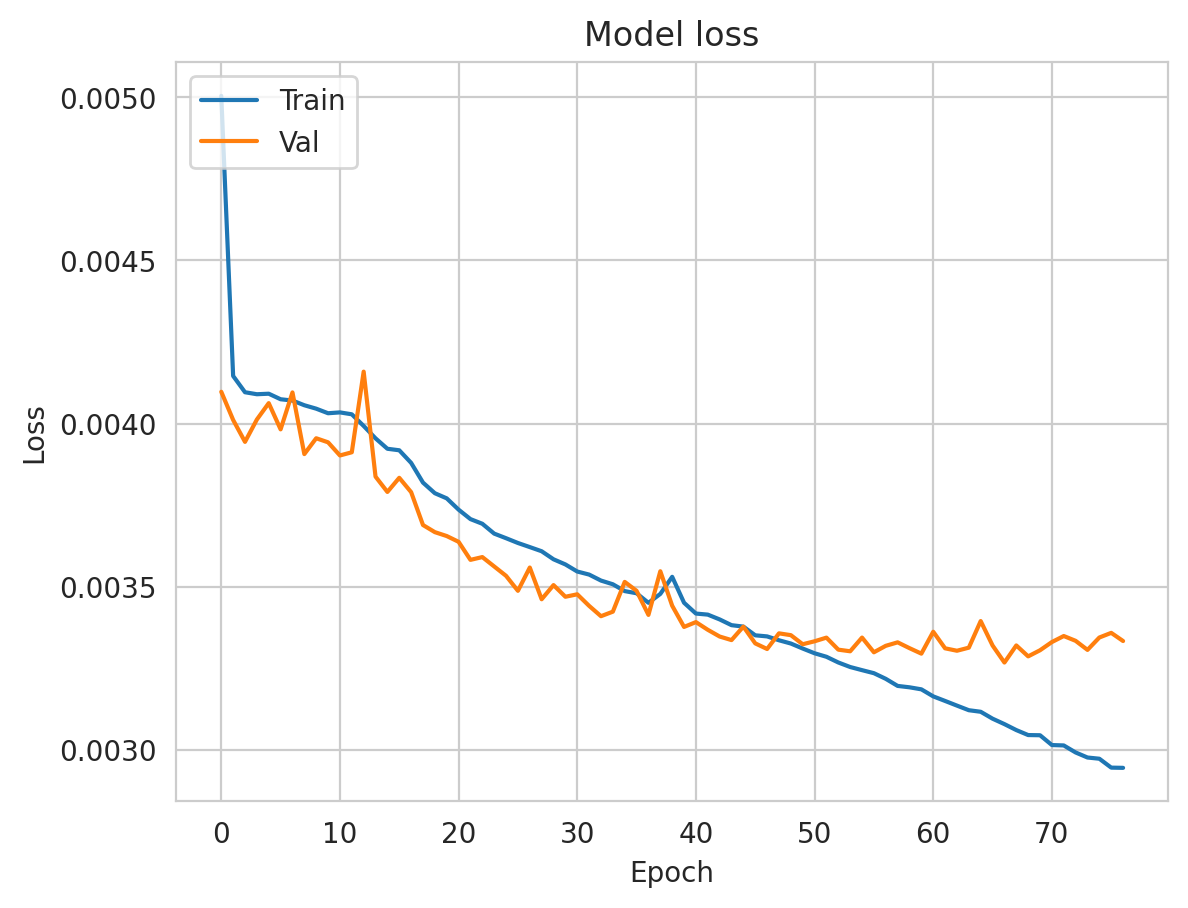

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1116/1116 [==============================] - 4s 4ms/step


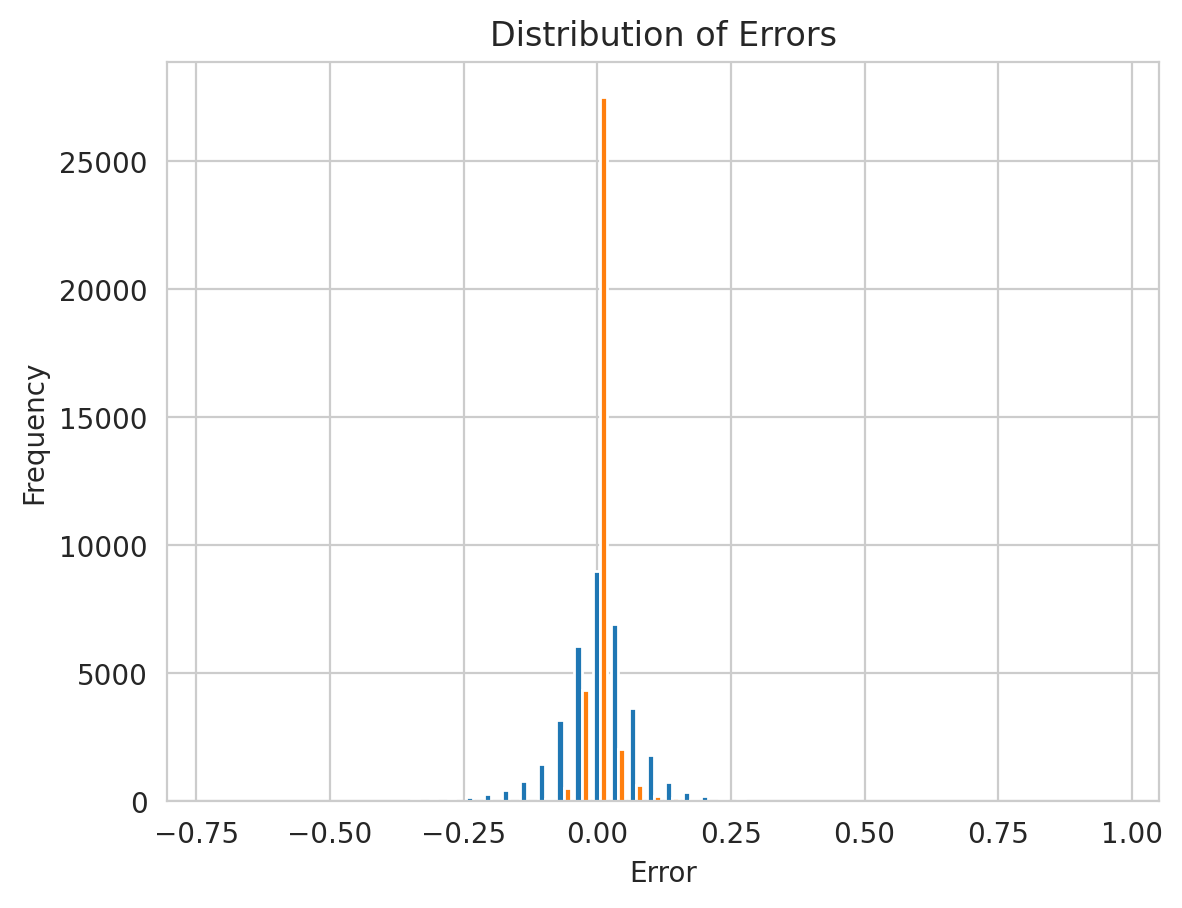

In [ ]:
# Assuming a regression problem
predictions = model.predict(X_test)
errors = y_test - predictions
plt.hist(errors, bins=50)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# For classification problems
from sklearn.metrics import classification_report, confusion_matrix

# Convert predictions to discrete classes if necessary
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
print(confusion_matrix(true_classes, predicted_classes))

# Classification report
print(classification_report(true_classes, predicted_classes))


[[35645     3]
 [   33     6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35648
           1       0.67      0.15      0.25        39

    accuracy                           1.00     35687
   macro avg       0.83      0.58      0.62     35687
weighted avg       1.00      1.00      1.00     35687



1116/1116 [==============================] - 5s 4ms/step


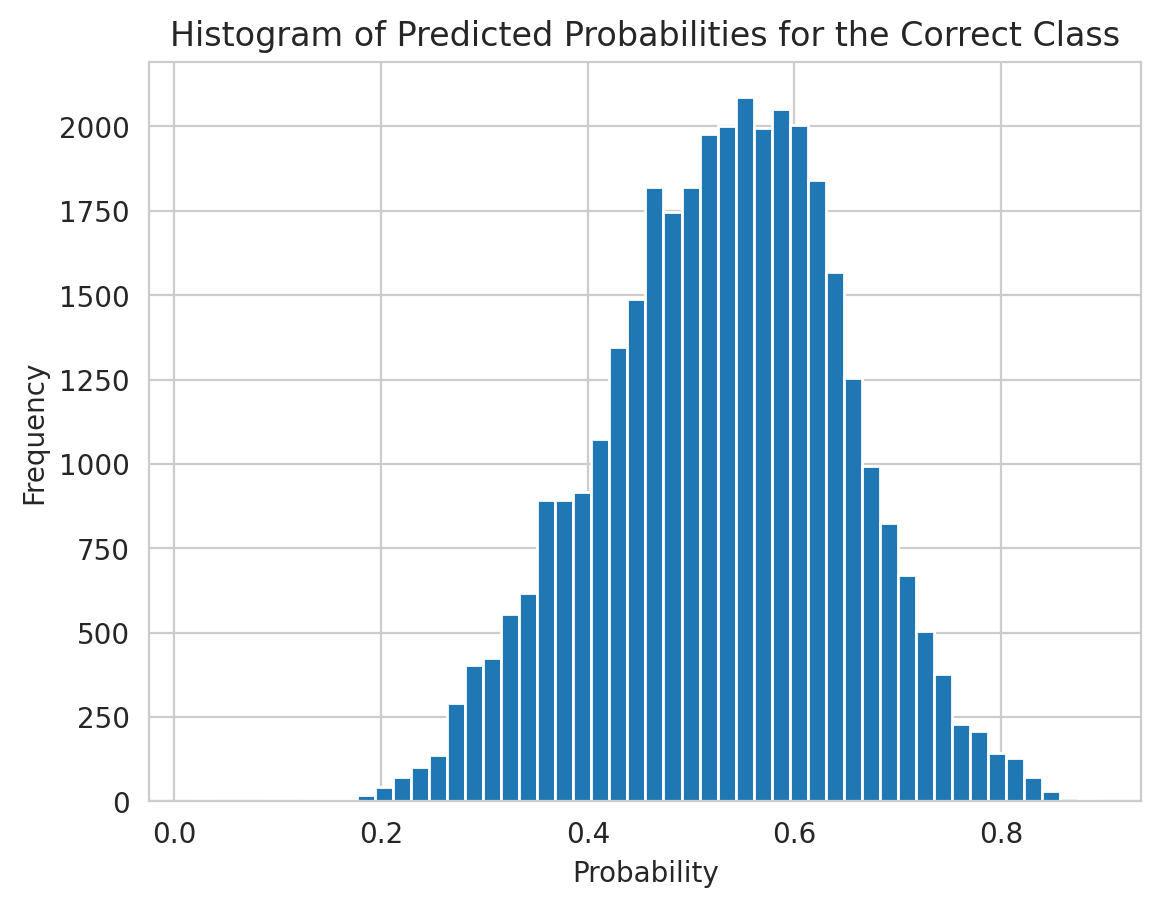

In [ ]:
# For classification problems
predicted_probs = model.predict(X_test)

# Plot a histogram of predicted probabilities of the correct class
correct_class_probs = predicted_probs[np.arange(len(y_test)), true_classes]
plt.hist(correct_class_probs, bins=50)
plt.title('Histogram of Predicted Probabilities for the Correct Class')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


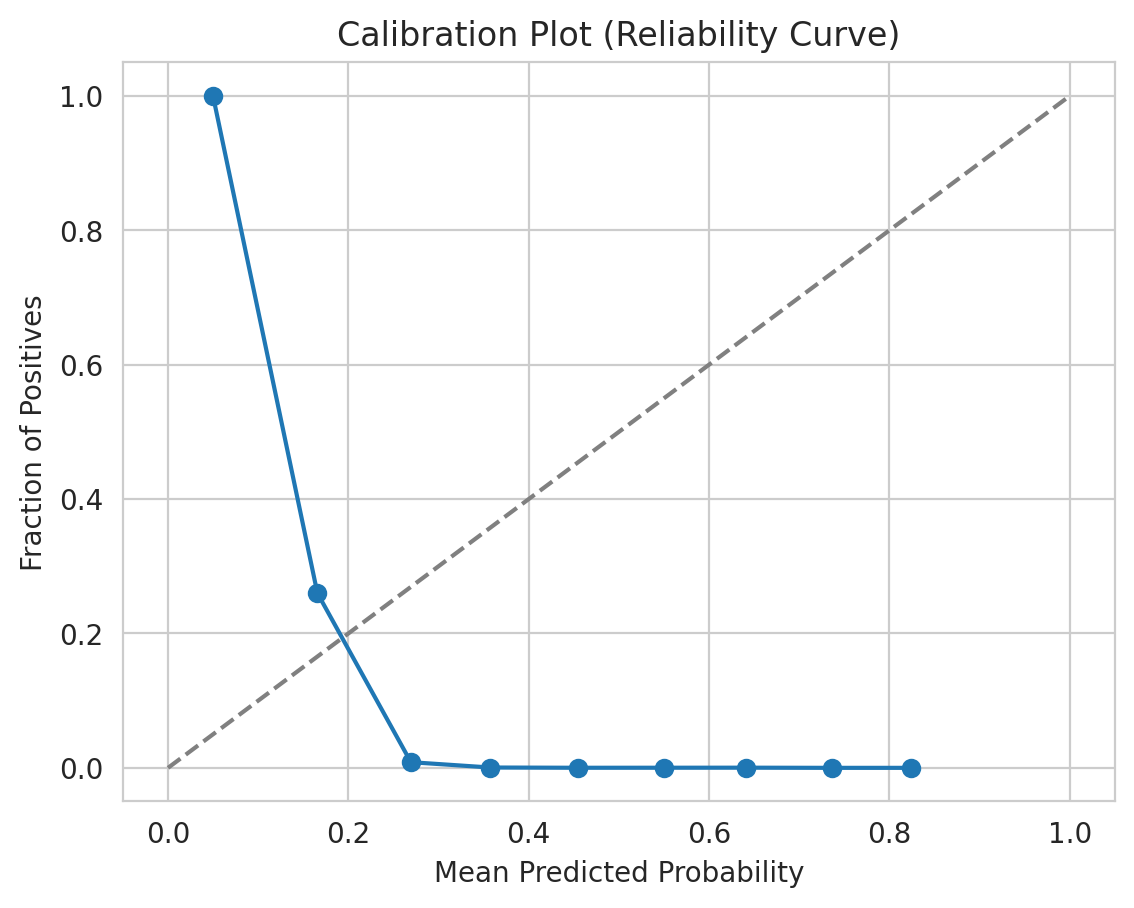

In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(true_classes, correct_class_probs, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Calibration Plot (Reliability Curve)')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.show()


Model 2

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
  from tensorflow.keras.regularizers import l2



  # First split: Separate out the test set
  X_temp, X_test, y_temp, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

  # Second split: Divide the remaining data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # Note: 0.25 here because it's 25% of the remaining 80% of the data

  # L2 regularization factor
  l2_reg = 1e-4

  model_v2 = Sequential([
      Bidirectional(LSTM(128, return_sequences=True,
                        kernel_regularizer=l2(l2_reg)),
                    input_shape=(X_train.shape[1], X_train.shape[2])),
      Dropout(0.3),
      BatchNormalization(),
      Bidirectional(LSTM(128, return_sequences=False,
                        kernel_regularizer=l2(l2_reg))),
      Dropout(0.3),
      BatchNormalization(),
      Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)),
      Dropout(0.3),
      Dense(y_train.shape[1], activation='linear')  # Adjust based on your output shape
  ])



In [ ]:
#size of train
print(X_train.shape)
print(y_train.shape)

(1134902, 50, 4)
(1134902, 4)


In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
import tensorflow.keras.backend as K

def interval_penalty(intervals):
    """
    Simple penalty function for dissonant intervals.
    This is a placeholder and should be adapted based on your music theory rules.

    Parameters:
    intervals (K.Tensor): Tensor of intervals (in semitones) between consecutive notes.

    Returns:
    K.Tensor: Penalty for dissonant intervals.
    """
    # Define penalties for dissonant intervals (1, 2, 6, 10, 11 semitones)
    dissonant_intervals = [1, 2, 6, 10, 11]
    penalty = K.sum(K.cast(K.any([K.equal(intervals, d) for d in dissonant_intervals]), 'float32'))
    return penalty

def music_theory_penalty(y_pred):
    """
    Calculates a penalty based on dissonant intervals between consecutive notes.

    Parameters:
    y_pred (K.Tensor): Predicted output from the model, assumed to be pitches of notes.

    Returns:
    K.Tensor: Scalar value representing the penalty for music theory violations.
    """
    # Calculate intervals between consecutive notes
    intervals = K.abs(y_pred[:, 1:] - y_pred[:, :-1])
    # Assuming y_pred is a flat sequence of pitches; adjust as necessary

    # Calculate the penalty for dissonant intervals
    penalty = interval_penalty(intervals)
    return penalty

def custom_loss_with_music_theory(y_true, y_pred):
    """
    Custom loss function that incorporates a music theory penalty.

    Parameters:
    y_true (K.Tensor): The true values.
    y_pred (K.Tensor): The predicted values from the model.

    Returns:
    K.Tensor: Combined loss including MSE and music theory penalty.
    """
    mse_loss = K.mean(K.square(y_pred - y_true))
    theory_penalty = music_theory_penalty(y_pred)
    # You might need to scale the penalty to ensure it doesn't dominate the MSE loss
    return mse_loss + 0.1 * theory_penalty  # Example scaling factor



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

callbacks = [lr_scheduler, early_stopping, model_checkpoint]


In [ ]:
from tensorflow.keras.optimizers import Adam
# Assuming tensorflow_addons is successfully installed and imported for AdamW
# optimizer = AdamW(weight_decay=1e-4)

optimizer = Adam(learning_rate=1e-4)  # Using standard Adam for simplicity
model_v2.compile(optimizer=optimizer, loss=custom_loss_with_music_theory)


In [ ]:
history = model_v2.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,  # Increased batch size for stability
    validation_data=(X_val, y_val),
    callbacks=callbacks
)


Epoch 1/150
8867/8867 [==============================] - 155s 16ms/step - loss: 0.1175 - val_loss: 0.0216 - lr: 1.0000e-04
Epoch 2/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0131 - val_loss: 0.0069 - lr: 1.0000e-04
Epoch 3/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0074 - val_loss: 0.0063 - lr: 1.0000e-04
Epoch 4/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0071 - val_loss: 0.0062 - lr: 1.0000e-04
Epoch 5/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0071 - val_loss: 0.0062 - lr: 1.0000e-04
Epoch 6/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0070 - val_loss: 0.0062 - lr: 1.0000e-04
Epoch 7/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0070 - val_loss: 0.0062 - lr: 1.0000e-04
Epoch 8/150
8867/8867 [==============================] - 141s 16ms/step - loss: 0.0070 - val_loss: 0.0062 - lr: 1.0000e-04
Epoch 9/150
8867

In [ ]:
test_loss = model_v2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

11822/11822 [==============================] - 60s 5ms/step - loss: 0.0059
Test Loss: 0.005896790884435177


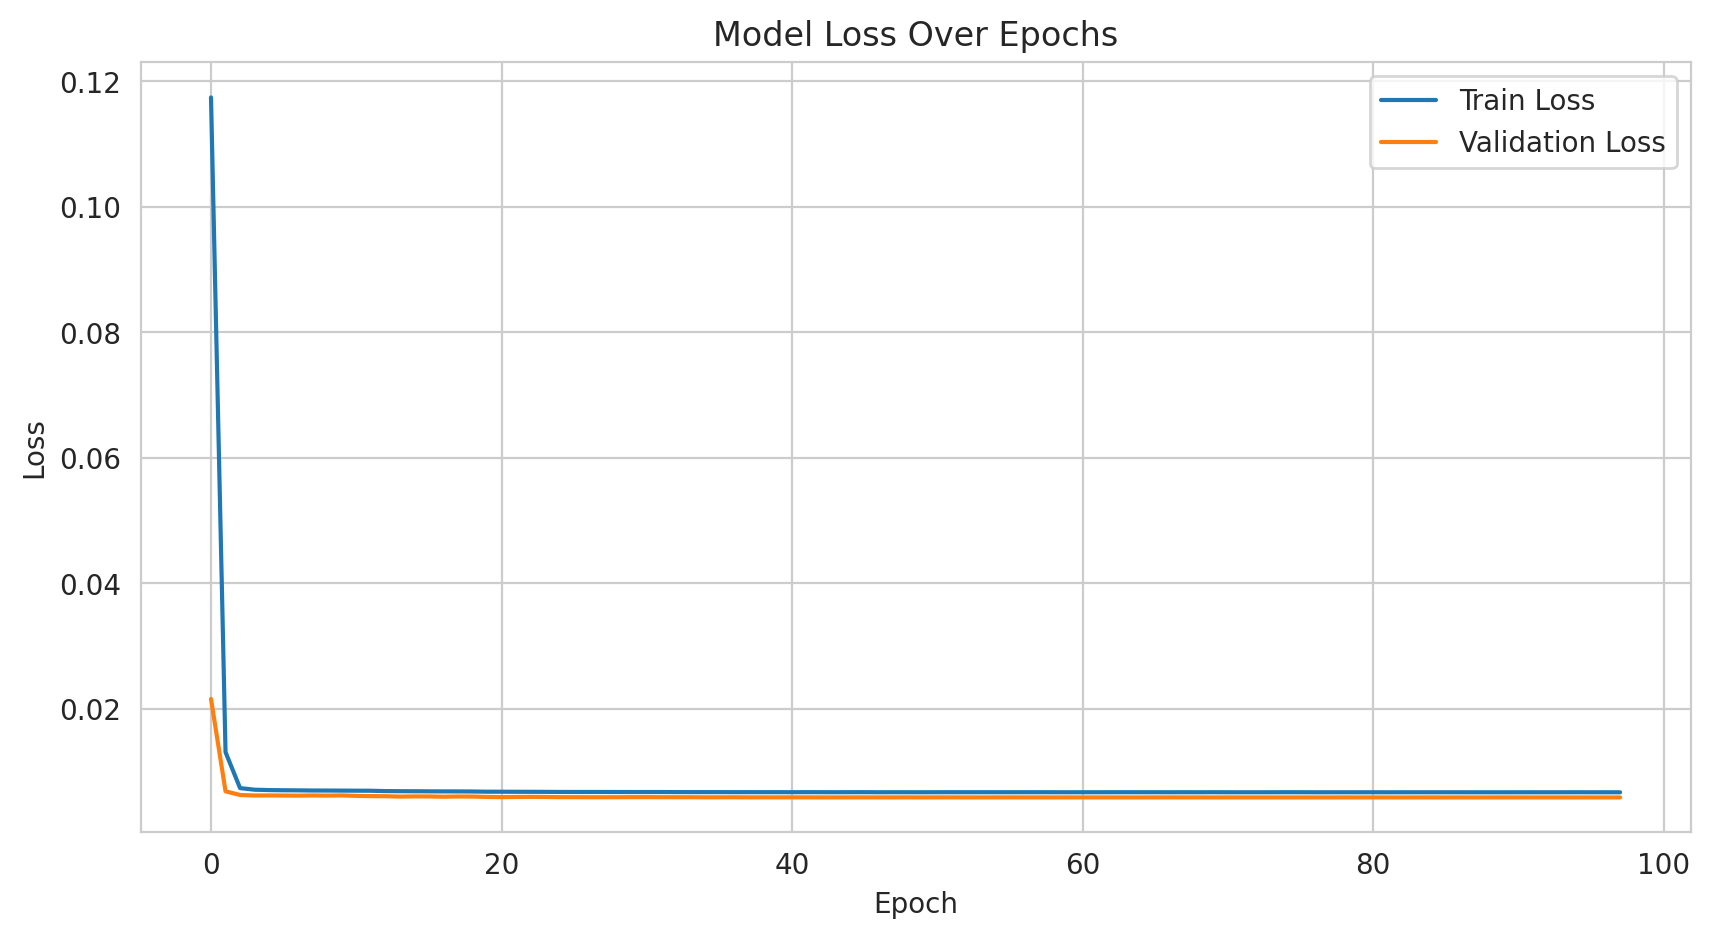

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def denormalize_note(normalized_note, feature_scaler):
    """
    Converts a normalized note back to its original representation using the provided feature_scaler.

    Parameters:
        normalized_note (np.ndarray): The normalized features for a note.
        feature_scaler (MinMaxScaler): A fitted MinMaxScaler instance used for denormalization.

    Returns:
        dict: A dictionary representing the denormalized note.
    """
    # Ensure the input is reshaped for inverse_transform
    denormalized_features = feature_scaler.inverse_transform(normalized_note.reshape(1, -1))
    denormalized_note = {
        'pitch': int(round(denormalized_features[0][0])),
        'start_time': denormalized_features[0][1],
        'duration': denormalized_features[0][2],  # Assuming the model predicts duration directly
        'velocity': int(round(denormalized_features[0][3]))
    }
    return denormalized_note

def generate_notes(model, seed_sequence, num_notes_to_generate, sequence_length, feature_scaler):
    generated_notes = []

    # Convert seed_sequence to a NumPy array at the beginning
    seed_sequence_array = np.array(seed_sequence)

    # Now, you can safely use seed_sequence_array.shape because it's a NumPy array
    if len(seed_sequence) < sequence_length:
        padding = np.zeros((sequence_length - len(seed_sequence), seed_sequence_array.shape[1]))
        current_sequence = np.vstack((padding, seed_sequence_array))
    else:
        current_sequence = seed_sequence_array

    for _ in range(num_notes_to_generate):
        # Ensure the sequence is correctly shaped for prediction
        sequence_to_predict = current_sequence[-sequence_length:].reshape(1, sequence_length, -1)

        # Predict the next note
        next_note_normalized = model.predict(sequence_to_predict)[0]

        # Denormalize the predicted note
        next_note = denormalize_note(next_note_normalized, feature_scaler)
        generated_notes.append(next_note)

        # Append the normalized next_note to current_sequence for the next prediction
        current_sequence = np.vstack([current_sequence, next_note_normalized.reshape(-1)])

        # Keep only the most recent sequence_length notes
        if len(current_sequence) > sequence_length:
            current_sequence = current_sequence[-sequence_length:]

    return generated_notes





In [ ]:
import numpy as np

def generate_seed_sequence(num_notes=100, num_features=4):
    """
    Generates a seed sequence with a specified number of notes, where each note has normalized feature values.

    Parameters:
    - num_notes: The number of notes to generate in the sequence. Default is 100.
    - num_features: The number of features per note. Default is 4, corresponding to pitch, start_time, duration, and velocity.

    Returns:
    - A list of lists, where each inner list represents a note with normalized feature values.
    """
    # Generate random values between 0 and 1 for each note's features
    seed_sequence = np.random.rand(num_notes, num_features).tolist()

    return seed_sequence

# Generate a seed sequence with 100 notes
seed_sequence_2 = generate_seed_sequence(num_notes=50, num_features=4)
print(seed_sequence_2)


[[0.08868447359986598, 0.16810802276040449, 0.20173073463475788, 0.6325595677227683], [0.17666971412427568, 0.47152306649155884, 0.7913905029651749, 0.14574261179713144], [0.9838292341298671, 0.9409420723432161, 0.9649507136761472, 0.10673836522416291], [0.2686823512072182, 0.9420030945593098, 0.9927000078066763, 0.4897385579990795], [0.3428410430398082, 0.7040679987996976, 0.7780798849919903, 0.5571968386725084], [0.013715259694839999, 0.12258753707450265, 0.2692857620023069, 0.8903887972155776], [0.7812093377528035, 0.6026680267170089, 0.3138985862679099, 0.13348508610739718], [0.1155819312078622, 0.45315203144664407, 0.4682898955994742, 0.5634302216746434], [0.42908024880336015, 0.30635471494922595, 0.011301351945273597, 0.8822363056384317], [0.8507255654711328, 0.09214043103285807, 0.5995870801970027, 0.5607303919324861], [0.3739025248568083, 0.32243294005139034, 0.6268187628732262, 0.9197117980922206], [0.07470119328444746, 0.29515807959053575, 0.46831518650054416, 0.6156713456000

In [ ]:
num_notes = 1000
sequence_length = 50
generated_notes = generate_notes(model_v2, seed_sequence_2, num_notes, sequence_length, feature_scaler)
print(generated_notes)

1/1 [==============================] - 0s 20ms/step
[{'pitch': 53, 'start_time': 36.99948, 'duration': 0.551816, 'velocity': 23}, {'pitch': 59, 'start_time': 31.135675, 'duration': 0.48244682, 'velocity': 31}, {'pitch': 65, 'start_time': 26.912256, 'duration': 0.4045717, 'velocity': 41}, {'pitch': 70, 'start_time': 27.556435, 'duration': 0.33116338, 'velocity': 48}, {'pitch': 73, 'start_time': 34.23937, 'duration': 0.2756512, 'velocity': 51}, {'pitch': 75, 'start_time': 42.252636, 'duration': 0.24403782, 'velocity': 52}, {'pitch': 75, 'start_time': 45.36205, 'duration': 0.22818719, 'velocity': 53}, {'pitch': 75, 'start_time': 45.436672, 'duration': 0.22211672, 'velocity': 54}, {'pitch': 75, 'start_time': 45.497025, 'duration': 0.21965043, 'velocity': 54}, {'pitch': 75, 'start_time': 45.83939, 'duration': 0.22119431, 'velocity': 54}, {'pitch': 73, 'start_time': 46.687492, 'duration': 0.22591507, 'velocity': 54}, {'pitch': 72, 'start_time': 48.338623, 'duration': 0.23146725, 'velocity': 

In [ ]:
import pretty_midi

def notes_to_midi(denormalized_notes, output_file, start_offset=0.5):
    """
    Converts denormalized notes to a MIDI file.

    Parameters:
    - denormalized_notes: List of dictionaries, each representing a denormalized note with 'pitch', 'start_time', 'duration', and 'velocity'.
    - output_file: The filename for the output MIDI file.
    - start_offset: Initial offset before starting the first note (in seconds).

    Returns:
    - Generates a MIDI file with the specified filename.
    """
    # Create a PrettyMIDI object
    midi = pretty_midi.PrettyMIDI()
    # Create an Instrument instance for a piano (instrument number 0)
    piano = pretty_midi.Instrument(program=0)

    for note in denormalized_notes:
        # Extract note attributes
        pitch = note['pitch']
        start = note['start_time'] + start_offset  # Apply offset to the start time
        end = start + note['duration']
        velocity = note['velocity']

        # Create a Note instance for this note
        midi_note = pretty_midi.Note(
            velocity=velocity,
            pitch=pitch,
            start=start,
            end=end
        )
        # Add it to our instrument
        piano.notes.append(midi_note)

    # Add the instrument to the PrettyMIDI object
    midi.instruments.append(piano)
    # Write out the MIDI data to the output file
    midi.write(output_file)


In [ ]:
notes_to_midi(generated_notes, 'drive/MyDrive/Tesina/generated_notes_model_v2.mid')